# **Project Name**    -



##### **Project Type**    - Email_Campaign_Effectiveness_Prediction
##### **Contribution**    - Priya Saxena

# **Project Summary -**

The goal of this project is to create a machine learning model designed to categorize and oversee email marketing messages originating from Gmail. Targeted at small to medium business proprietors, the aim is to optimize the efficiency of their email campaigns and boost customer retention.

An inherent challenge in email marketing lies in discerning which emails are read, ignored, or acknowledged by recipients. To tackle this challenge, the project will gather data on various email attributes such as subject lines, sender names, content, formats, frequencies, target audiences, and other pertinent factors.

Utilizing this dataset, the project will train a machine learning model to predict whether an email is likely to be read, ignored, or acknowledged by the recipient. The model will then assess new emails, providing predictions on how they are expected to be received.

To gauge the model's efficacy, the project will partition the data into a training set and a testing set. The training set will be employed to refine the model, while the testing set will evaluate its accuracy and effectiveness through metrics like precision, recall, and F1 score.

Upon successful training and evaluation, the model can be deployed in a live environment, offering support to small to medium business owners in enhancing the impact of their email marketing initiatives. Through the model's analysis and monitoring of emails, business owners can make informed decisions about targeting their marketing strategies and enhancing customer retention.

In essence, this project seeks to furnish small to medium business owners with a valuable tool, utilizing machine learning to classify and monitor emails, thereby improving the efficacy of their email marketing campaigns.

# **GitHub Link -**

https://github.com/piyaSaxena04/EMAIL_CAMPAIGN_EFFECTIVENESS-Priya-Saxena-

# **Problem Statement**


A significant number of small to medium business proprietors are effectively employing Gmail-based email marketing strategies to offline target and convert potential customers into leads, aiming to cultivate lasting relationships in their business.

The primary goal is to develop a machine learning model that can classify emails and monitor their reception, distinguishing between those that are ignored, read, and acknowledged by the recipient.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
from scipy.stats import *
from scipy import stats
import math
from collections import Counter

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, roc_auc_score, classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.neighbors import KNeighborsClassifier

!pip install shap
import shap

# The following lines adjust the granularity of reporting.
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
email_df = pd.read_csv('/content/drive/MyDrive/data_email_campaign.csv')

### Dataset First View

In [ ]:
# Dataset First Look
email_df.head()
email_df.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.40,1,F,2,22.00,3,737,16.00,13.00,0
68349,EMA00089998225300,1,1.30,1,C,2,40.00,2,653,31.00,16.00,0
68350,EMA00089998436500,1,2.20,2,NaN,2,33.00,2,490,9.00,0.00,0
68351,EMA00089999168800,1,0.40,1,E,2,50.00,1,733,14.00,4.00,0
68352,EMA00089999316900,1,1.50,1,G,2,20.00,2,1038,6.00,0.00,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
email_df.shape

(68353, 12)

### Dataset Information

In [ ]:
# Dataset Info
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'Duplicate values in the email_df dataset: {len(email_df[email_df.duplicated()])}')

Duplicate values in the email_df dataset: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
email_df.isnull().sum()
columns = list(email_df.columns)
columns

['Email_ID',
 'Email_Type',
 'Subject_Hotness_Score',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Total_Past_Communications',
 'Time_Email_sent_Category',
 'Word_Count',
 'Total_Links',
 'Total_Images',
 'Email_Status']

In [ ]:
# Visualizing the missing values
for feature in columns:
  print(f'Percentage of missing values in {feature} feature: {(email_df[feature].isnull().sum())/email_df.shape[0]*100}%')

Percentage of missing values in Email_ID feature: 0.0%
Percentage of missing values in Email_Type feature: 0.0%
Percentage of missing values in Subject_Hotness_Score feature: 0.0%
Percentage of missing values in Email_Source_Type feature: 0.0%
Percentage of missing values in Customer_Location feature: 16.96341053062777%
Percentage of missing values in Email_Campaign_Type feature: 0.0%
Percentage of missing values in Total_Past_Communications feature: 9.984931166152181%
Percentage of missing values in Time_Email_sent_Category feature: 0.0%
Percentage of missing values in Word_Count feature: 0.0%
Percentage of missing values in Total_Links feature: 3.220048863985487%
Percentage of missing values in Total_Images feature: 2.4534402293973927%
Percentage of missing values in Email_Status feature: 0.0%


### What did you know about your dataset?

The dataset comprises 68,353 observations and includes 12 features. It encompasses a combination of integer, float, and object data types.

Notably, all values in the dataset are unique, indicating an absence of duplicates. This absence of duplicates is crucial for ensuring unbiased results in downstream analyses, preventing potential issues such as result distortion or challenges in accurately summarizing the data.

Several features exhibit null values, with percentages as follows: customer location (11,595, i.e., 16%), total past communication (6,825, i.e., 10%), total links (2,201, i.e., 3%), and total images (1,677, i.e., 2%).

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
email_df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
# Dataset Describe
email_df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.00,68353.00,68353.00,68353.00,61528.00,68353.00,68353.00,66152.00,66676.00,68353.00
mean,1.29,1.10,1.46,2.27,28.93,2.00,699.93,10.43,3.55,0.23
std,0.45,1.00,0.50,0.47,12.54,0.63,271.72,6.38,5.60,0.50
min,1.00,0.00,1.00,1.00,0.00,1.00,40.00,1.00,0.00,0.00
25%,1.00,0.20,1.00,2.00,20.00,2.00,521.00,6.00,0.00,0.00
50%,1.00,0.80,1.00,2.00,28.00,2.00,694.00,9.00,0.00,0.00
75%,2.00,1.80,2.00,3.00,38.00,2.00,880.00,14.00,5.00,0.00
max,2.00,5.00,2.00,3.00,67.00,3.00,1316.00,49.00,45.00,2.00


### Variables Description

'Email_ID' is the user id, 'Email_Type' it describe about business,social etc, 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location' the location of the sender of the mail, 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for feature in columns[1:]:
  print(f'Unique values of {feature}:\n', email_df[feature].unique(), '\n')

Unique values of Email_Type:
 [1 2] 

Unique values of Subject_Hotness_Score:
 [2.2 2.1 0.1 3.  0.  1.5 3.2 0.7 2.  0.5 0.2 1.  4.  1.9 1.1 1.6 0.3 2.3
 1.4 1.7 2.8 1.2 0.8 0.6 4.2 1.8 2.4 0.9 1.3 3.3 2.6 3.1 4.1 2.9 2.7 0.4
 3.5 3.7 2.5 3.8 3.9 3.4 4.6 4.5 3.6 4.4 4.7 5.  4.3 4.8 4.9] 

Unique values of Email_Source_Type:
 [2 1] 

Unique values of Customer_Location:
 ['E' nan 'B' 'C' 'G' 'D' 'F' 'A'] 

Unique values of Email_Campaign_Type:
 [2 3 1] 

Unique values of Total_Past_Communications:
 [33. 15. 36. 25. 18. nan 34. 21. 40. 27. 24. 42. 11. 23. 37. 35. 51.  9.
 39. 31. 50. 30. 14. 45. 53. 28.  7. 38. 52. 22. 43. 12. 16. 20. 41. 56.
 26. 29.  5. 32. 44. 10. 17. 46. 47. 48.  8. 49. 13.  0.  6. 55. 19. 60.
 59. 61. 54. 62. 57. 64. 58. 65. 66. 67. 63.] 

Unique values of Time_Email_sent_Category:
 [1 2 3] 

Unique values of Word_Count:
 [ 440  504  962  610  947  416  116 1241  655  744  931  550  565  700
  694 1061  623  560 1082  684  733 1122  649  778  855  704  339  988
  389 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Checking Shape of Email Read
print("No. of Email Read : ",len(email_df[email_df['Email_Status'] == 1]))
# Checking Shape of Email Acknowledged by Reader
print("No. of Email Acknowledged : ",len(email_df[email_df['Email_Status'] == 2]))
# Checking Shape of Email Ignored
print("No. of Email Ignored : ",len(email_df[email_df['Email_Status'] == 0]))


No. of Email Read :  11039
No. of Email Acknowledged :  2373
No. of Email Ignored :  54941


In [ ]:
#creating variable to store numerical feature
num_feature = email_df.select_dtypes(include = 'float').columns.to_list()
num_feature.append('Word_Count')
num_feature

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count']

In [ ]:
#creating variable to store categorial features
cat_feature = [feature for feature in email_df.columns.to_list() if feature not in num_feature]
cat_feature

['Email_ID',
 'Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

In [ ]:
# function to calculate engagement rate, open rate and ignored rate
#engagement rate
def Engagement(group):
  acknowledged_emails = group[group['Email_Status'] == 2]
  return len(acknowledged_emails) / len(group)

#open rate
def Open(group):
  opened_emails = group[group['Email_Status'] != 0]
  return len(opened_emails) / len(group)

#ignore rate
def Ignore(group):
  ignored_emails = group[group['Email_Status'] == 0]
  return (len(ignored_emails)/ len(group))

In [ ]:
# calculating engagement, open and ignored rate for each categorial feaure
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Engagement Rate for {cat}')
    print(email_df.groupby(cat).apply(Engagement))
    print('\n')
    print(f'Open Rate for {cat}')
    print(email_df.groupby(cat).apply(Open))
    print('\n')
    print(f'Ignored Rate for {cat}')
    print(email_df.groupby(cat).apply(Ignore))
    print('='*120)

Engagement Rate for Email_Type
Email_Type
1   0.03
2   0.04
dtype: float64


Open Rate for Email_Type
Email_Type
1   0.20
2   0.18
dtype: float64


Ignored Rate for Email_Type
Email_Type
1   0.80
2   0.82
dtype: float64
Engagement Rate for Email_Source_Type
Email_Source_Type
1   0.04
2   0.03
dtype: float64


Open Rate for Email_Source_Type
Email_Source_Type
1   0.20
2   0.19
dtype: float64


Ignored Rate for Email_Source_Type
Email_Source_Type
1   0.80
2   0.81
dtype: float64
Engagement Rate for Customer_Location
Customer_Location
A   0.03
B   0.03
C   0.04
D   0.03
E   0.04
F   0.04
G   0.04
dtype: float64


Open Rate for Customer_Location
Customer_Location
A   0.20
B   0.19
C   0.19
D   0.20
E   0.20
F   0.19
G   0.20
dtype: float64


Ignored Rate for Customer_Location
Customer_Location
A   0.80
B   0.81
C   0.81
D   0.80
E   0.80
F   0.81
G   0.80
dtype: float64
Engagement Rate for Email_Campaign_Type
Email_Campaign_Type
1   0.24
2   0.01
3   0.08
dtype: float64


Open Rate for Ema

### What all manipulations have you done and insights you found?

Examined the effectiveness of an email campaign by evaluating engagement rates and bounce/ignore occurrences.

The results revealed a significant 80% of emails were disregarded, while only 17% were read, and a mere 3% were acknowledged.

Implemented categorization of features to enhance comprehension of their interrelationships, leading to the determination of engagement rates for each categorical variable.

Calculated link and image density concerning the total word count, establishing their respective percentages relative to the overall word count.

Introduced a combined metric involving the subject hotness score and total past communication, resulting in a comprehensive weight for analysis.

Identified a noteworthy trend: emails with an average of at least 37 total communications had an increased likelihood of acknowledgment. Additionally, those with an average word count between 590 and 600, along with a maximum of 10 links and 3 images, exhibited higher chances of acknowledgment.

Highlighted an effective email strategy within Email Type 1, sourced from 2, located in c, and belonging to Campaign Type 1, particularly when sent in the morning, showcasing a higher rate of acknowledged emails.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

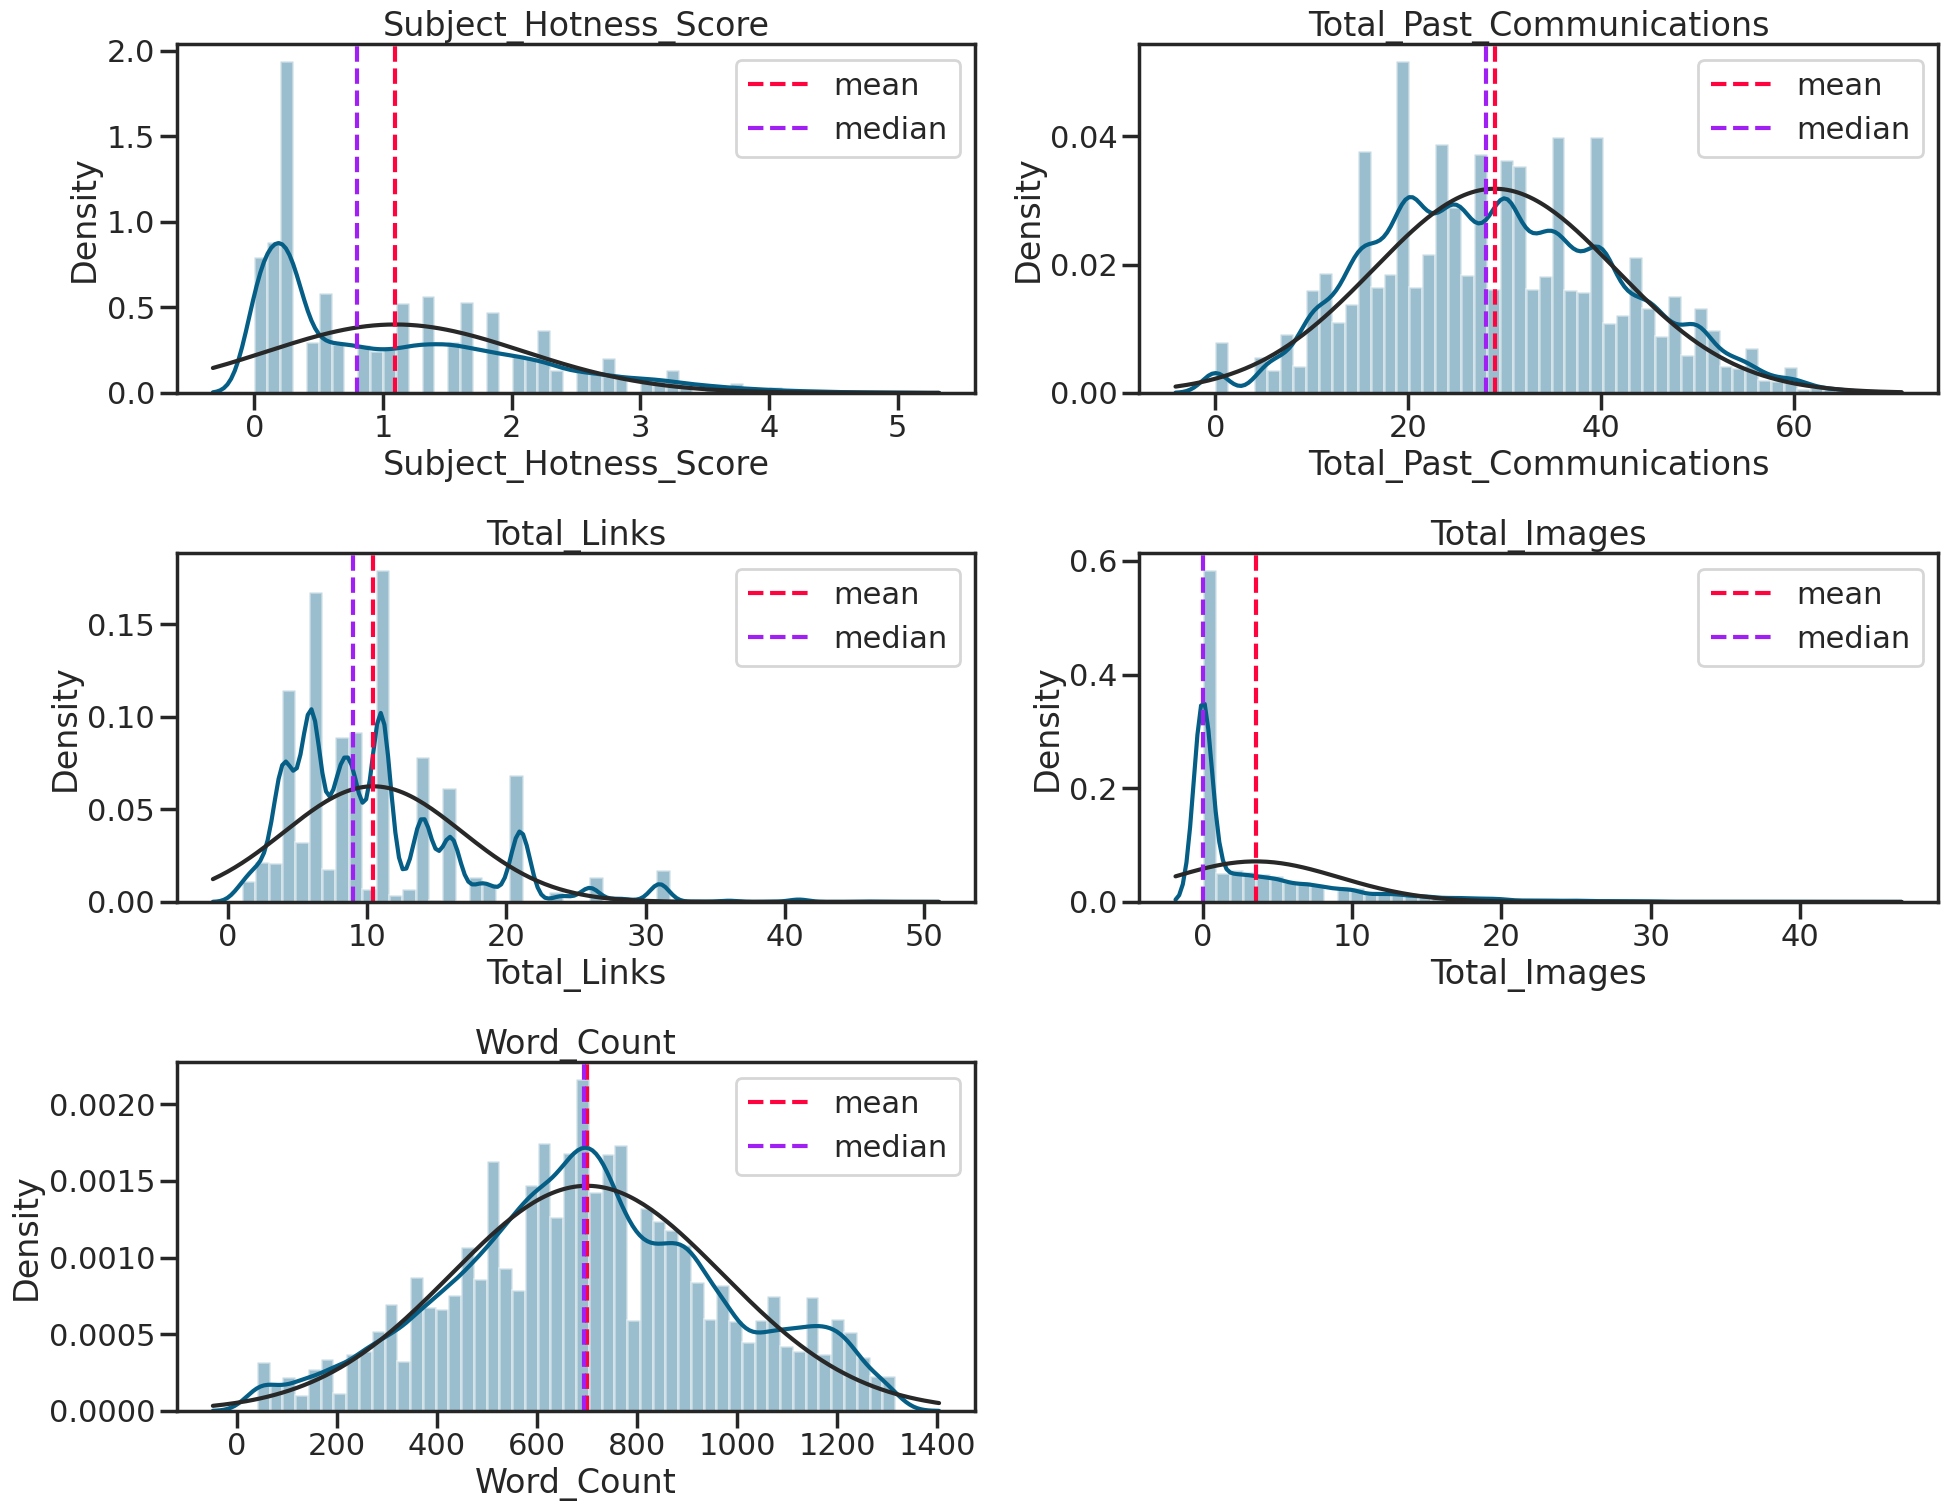

In [ ]:
# Chart - 1 visualization code
enumerate(num_feature)
graph = plt.figure(figsize = (20,30))
for i,col in enumerate(num_feature) :
    sns.set_style("ticks")
    sns.set_context("poster");
    plt.subplot(6,2,i+1);
    sns.distplot(email_df[col], color = '#055E85', fit = norm);
    feature = email_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');
    plt.axvline(feature.median(), color='#A020F3', linestyle='dashed', linewidth=3,label='median');
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

The plot above, commonly referred to as a distplot, seamlessly integrates a histogram with a KDE (Kernel Density Estimation) plot, offering an efficient visualization method for understanding the distribution of continuous variables.

##### 2. What is/are the insight(s) found from the chart?

The subject hotness score, total image, and total links distributions are positively skewed, indicating a concentration of values toward higher scores or counts. In contrast, the word count and total communication count exhibit relatively normal distributions, suggesting a more balanced spread of values.

Furthermore, specific average values provide additional insights: the subject hotness score averages 1, the total communication count averages 30, the total links average is 10, the total image average is 3, and the word count average is 700. These averages offer a central tendency measure, shedding light on the typical values within each respective variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights derived from the plot focus on understanding the distribution of each variable, facilitating model building, addressing null values, and handling outliers in the context of an email campaign. While the plot is valuable for these purposes, it doesn't inherently provide insights into the potential causes of negative growth.

To predict negative growth, additional analysis is necessary, considering factors beyond the distribution of individual variables. For example, one might need to explore the relationships between variables, assess the impact of external factors, or delve into time-based trends. The plot alone, despite its usefulness in understanding variable distributions and campaign effectiveness, lacks the depth required to identify specific causes or predictors of negative growth in the broader context of email marketing.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
ds_cat = email_df[cat_feature]
ds_cat

,Email_ID,Email_Type,Email_Source_Type,Customer_Location,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,EMA00081000034500,1,2,E,2,1,0
1,EMA00081000045360,2,1,NaN,2,2,0
2,EMA00081000066290,2,1,B,3,2,1
3,EMA00081000076560,1,2,E,2,2,0
4,EMA00081000109720,1,2,C,3,2,0
...,...,...,...,...,...,...,...
68348,EMA00089995974500,2,1,F,2,3,0
68349,EMA00089998225300,1,1,C,2,2,0
68350,EMA00089998436500,1,2,NaN,2,2,0
68351,EMA00089999168800,1,1,E,2,1,0


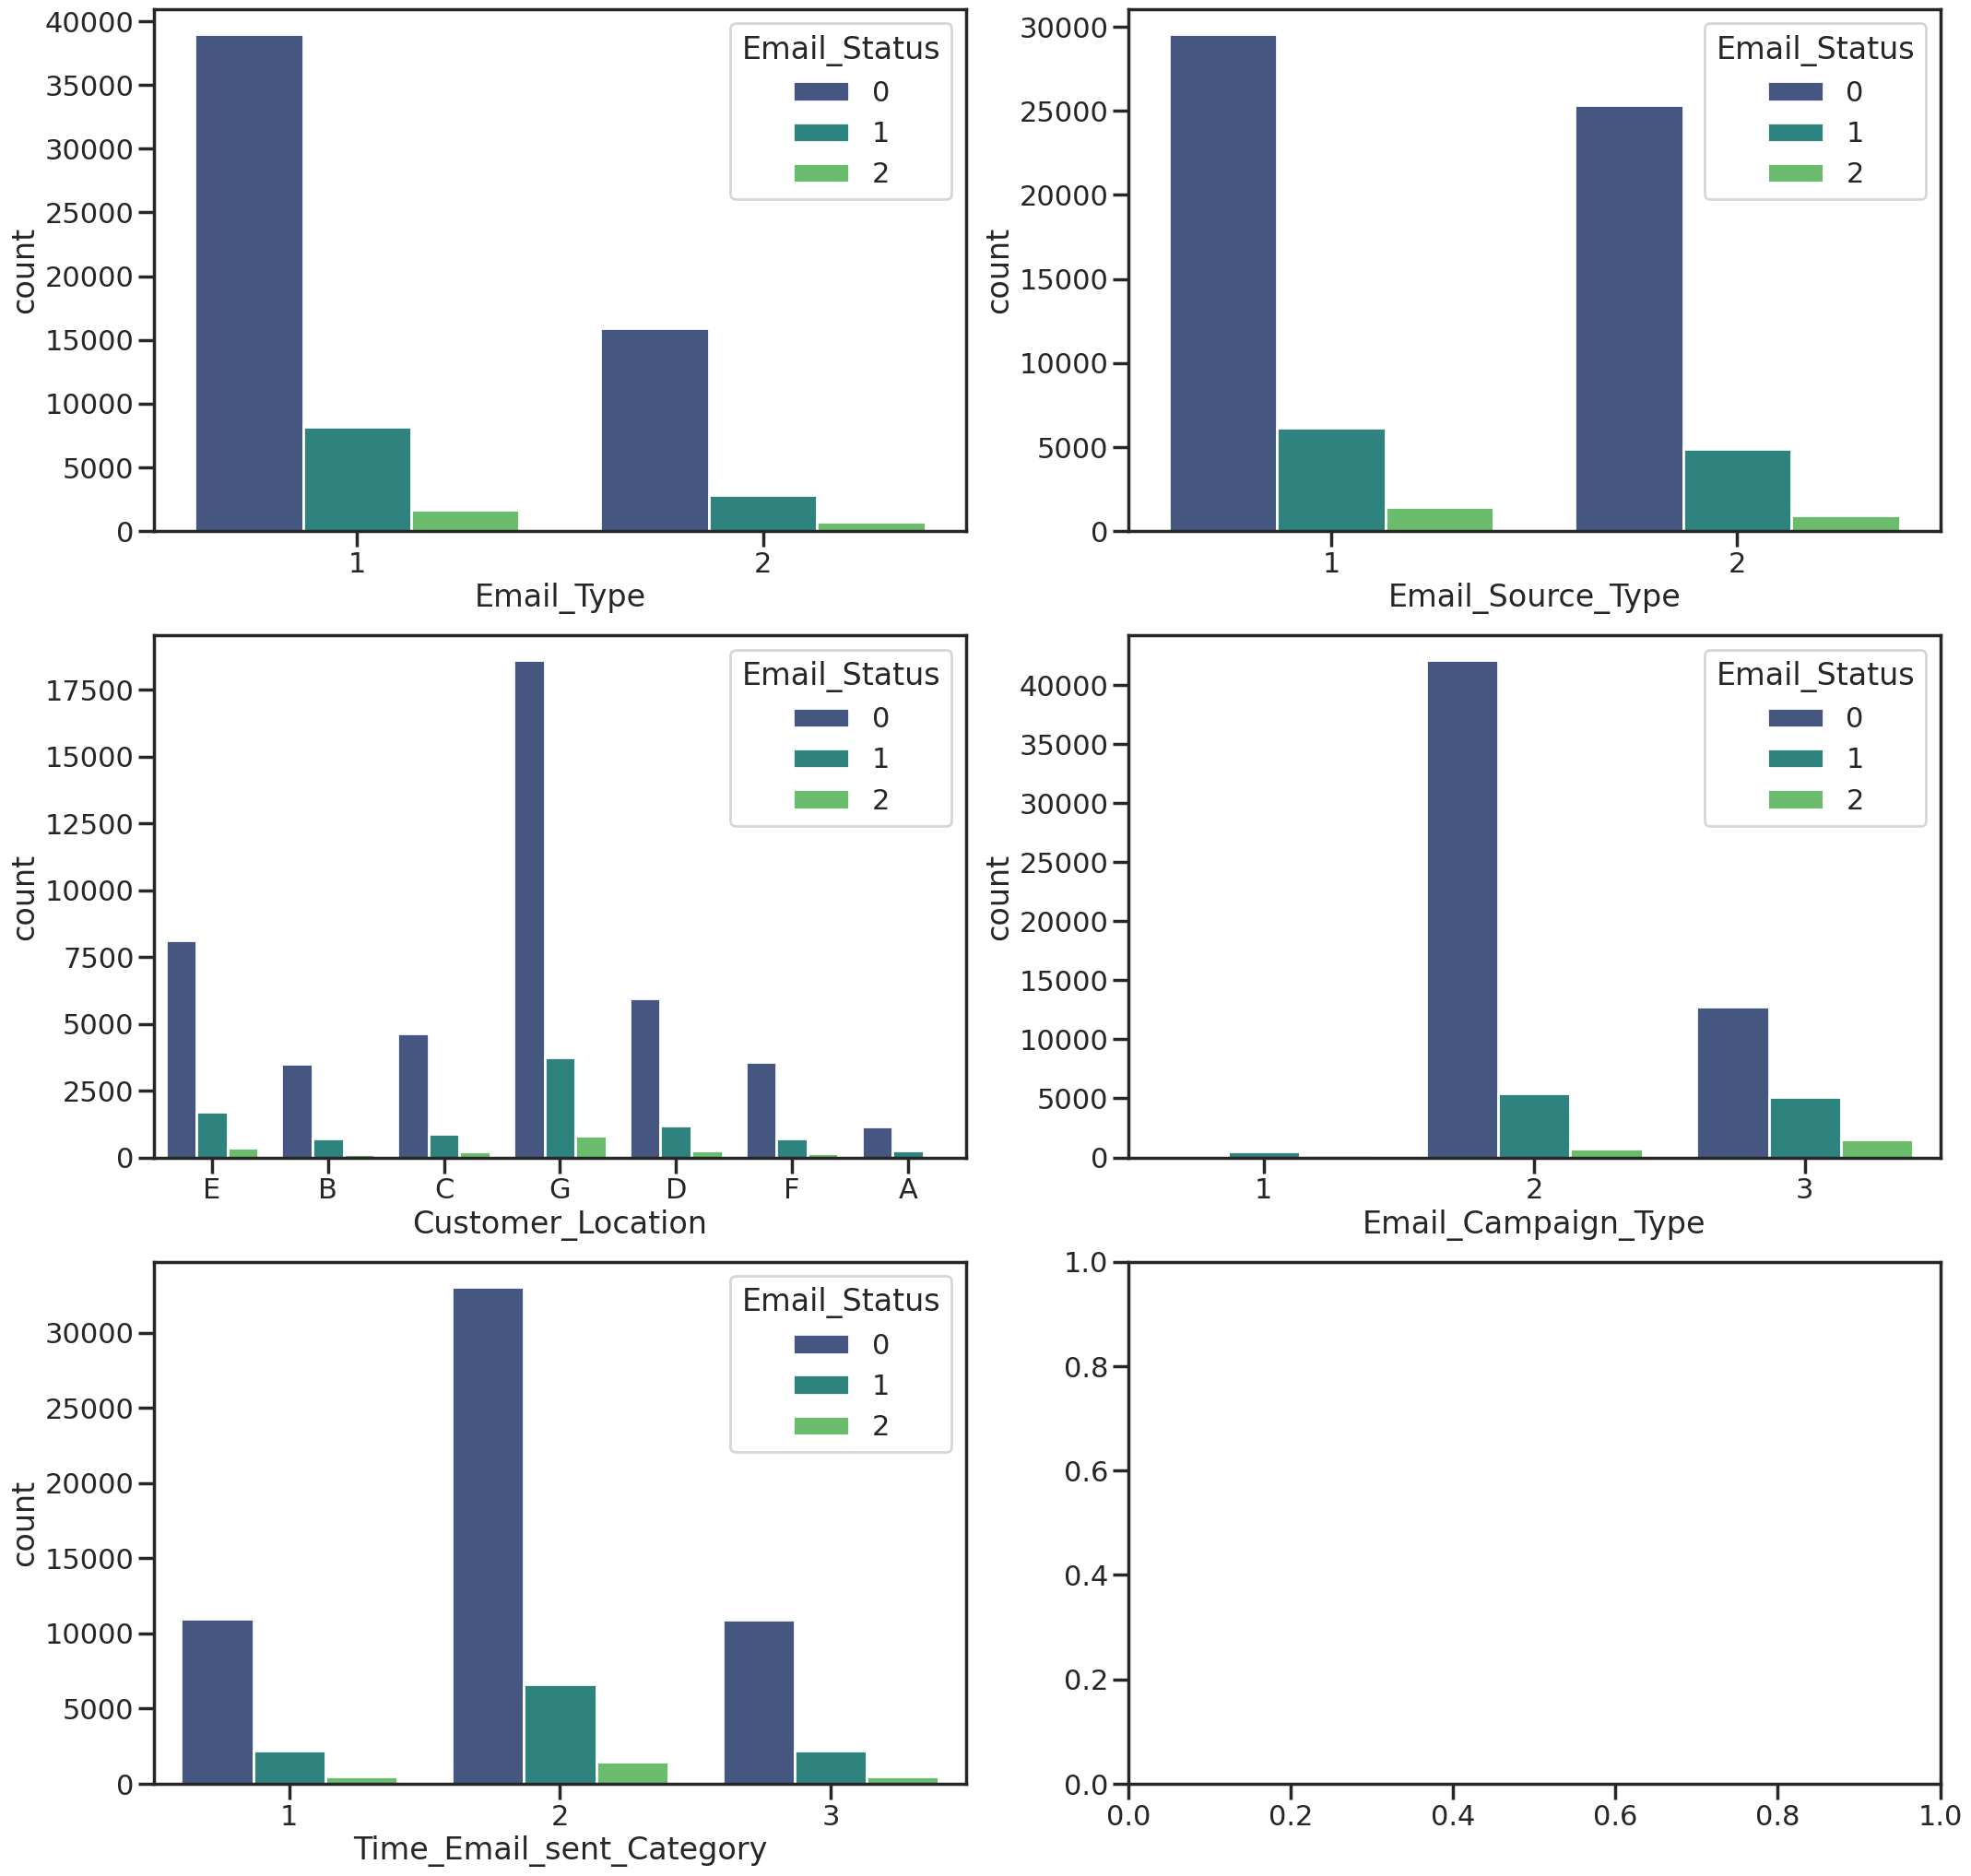

In [ ]:
fig, axs = plt.subplots(3, 2,figsize=(25, 25))
# j and k is for iterating through axis in subplot
j=0
k=-1
for i in cat_feature[1:-1]:
# Updating j and k for plotting on subplot
  k+=1
  if k>1:
    k=0
    j+=1

  sns.countplot(data = ds_cat, x=i,hue='Email_Status', ax=axs[j, k],palette='viridis')
  # axs[j,k].set(title = f'Graph between {i} and Sales', xlabel=i)

##### 1. Why did you pick the specific chart?

Barplots are indeed versatile tools that aid in the comprehension of both discrete and continuous data. These visualizations are particularly effective in displaying the frequency counts of values across various levels of a categorical or nominal variable. The bars in a bar chart represent these counts, providing a straightforward representation of the distribution of data.

Moreover, bar charts can go beyond simple counts and showcase additional statistics, such as percentages. This added layer of information allows for a more nuanced understanding of the data, enabling viewers to grasp the relative proportions of different categories within the dataset. Whether illustrating raw frequencies or presenting percentages, barplots serve as valuable instruments for visually summarizing and communicating information about categorical variables.

##### 2. What is/are the insight(s) found from the chart?

The distribution of Email_Status remains relatively consistent across various categories, with the notable exception of Email_Campaign_Type, where a distinct trend is evident.

In particular, for Email_Campaign_Type=1, a mere 10% of customers are ignoring the email, suggesting a high level of engagement. Conversely, for Type 2 campaigns, approximately 87% of customers are ignoring the emails, indicating a significant disinterest or lack of responsiveness to this particular campaign type. This observation underscores the importance of considering campaign types when analyzing email engagement, as it seems to play a crucial role in influencing customer responses.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Type 1 = Marketing

Type 2 = Important Notice

#### Chart - 3

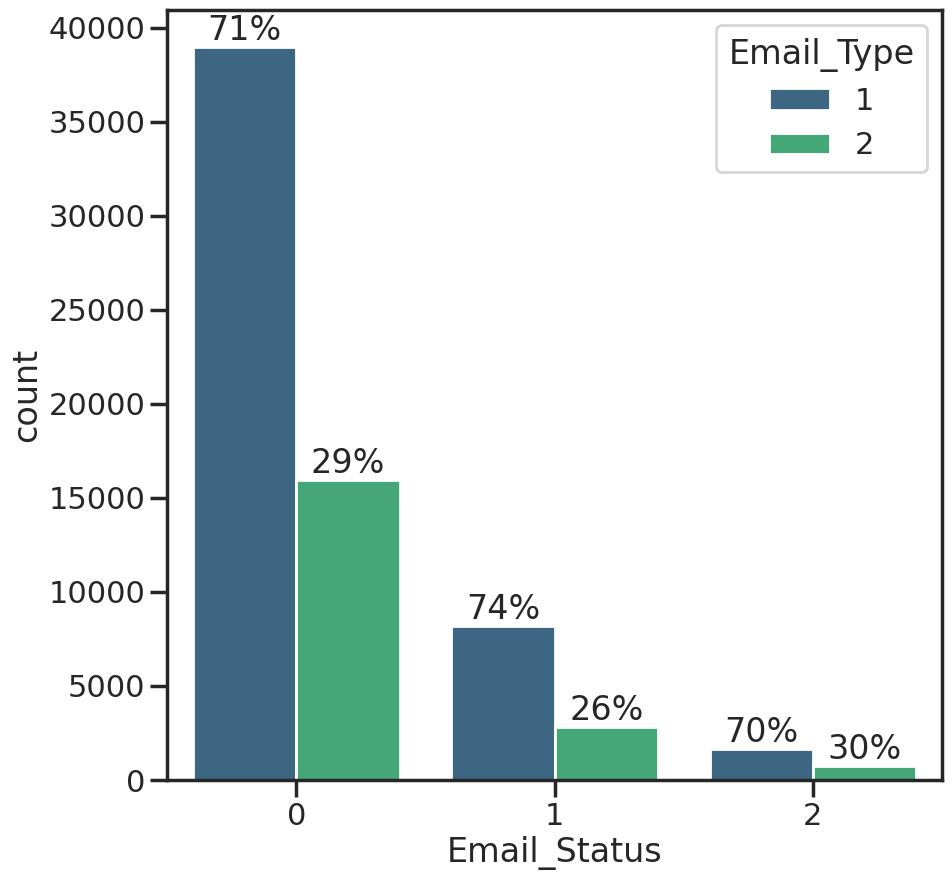

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize = (10,10))
ax = sns.countplot(x=email_df['Email_Status'], hue=email_df['Email_Type'], palette='viridis')
unique = len([x for x in email_df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")
plt.show()

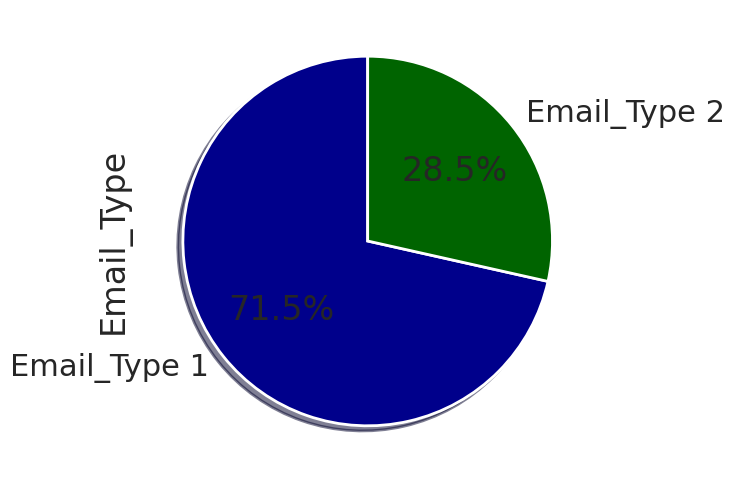

In [ ]:
email_df['Email_Type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Email_Type 1','Email_Type 2'],
                               colors=['darkblue','darkgreen'],
                               explode=[0,0]
                              );

##### 1. Why did you pick the specific chart?

Pie plots serve as effective tools for illustrating the proportional composition of a dataset. They are particularly valuable when the goal is to compare the relative sizes of different subcategories or to depict how distinct categories contribute to the entirety of the dataset.

While visually appealing and easy to interpret, pie plots do have limitations. They may become less effective when dealing with a large number of categories, as the slices can become small and challenging to distinguish. Additionally, pie plots are not well-suited for representing continuous data, as they work best when showcasing discrete categories. In such cases, alternative visualizations, such as bar charts or histograms, may be more appropriate for effectively conveying the nuances of the data.

##### 2. What is/are the insight(s) found from the chart?

The overall number of ignored emails is significantly higher than the number of acknowledged emails. Specifically, out of the 71% of emails classified as type 1, 71% were ignored, resulting in only a 29% open rate. Meanwhile, out of the 29% of emails classified as type 2, only 29% were ignored, resulting in a 71% open rate.

Therefore, despite being sent in fewer volumes, type 2 emails produced more promising results with a higher percentage of acknowledged emails.

#### Chart - 4

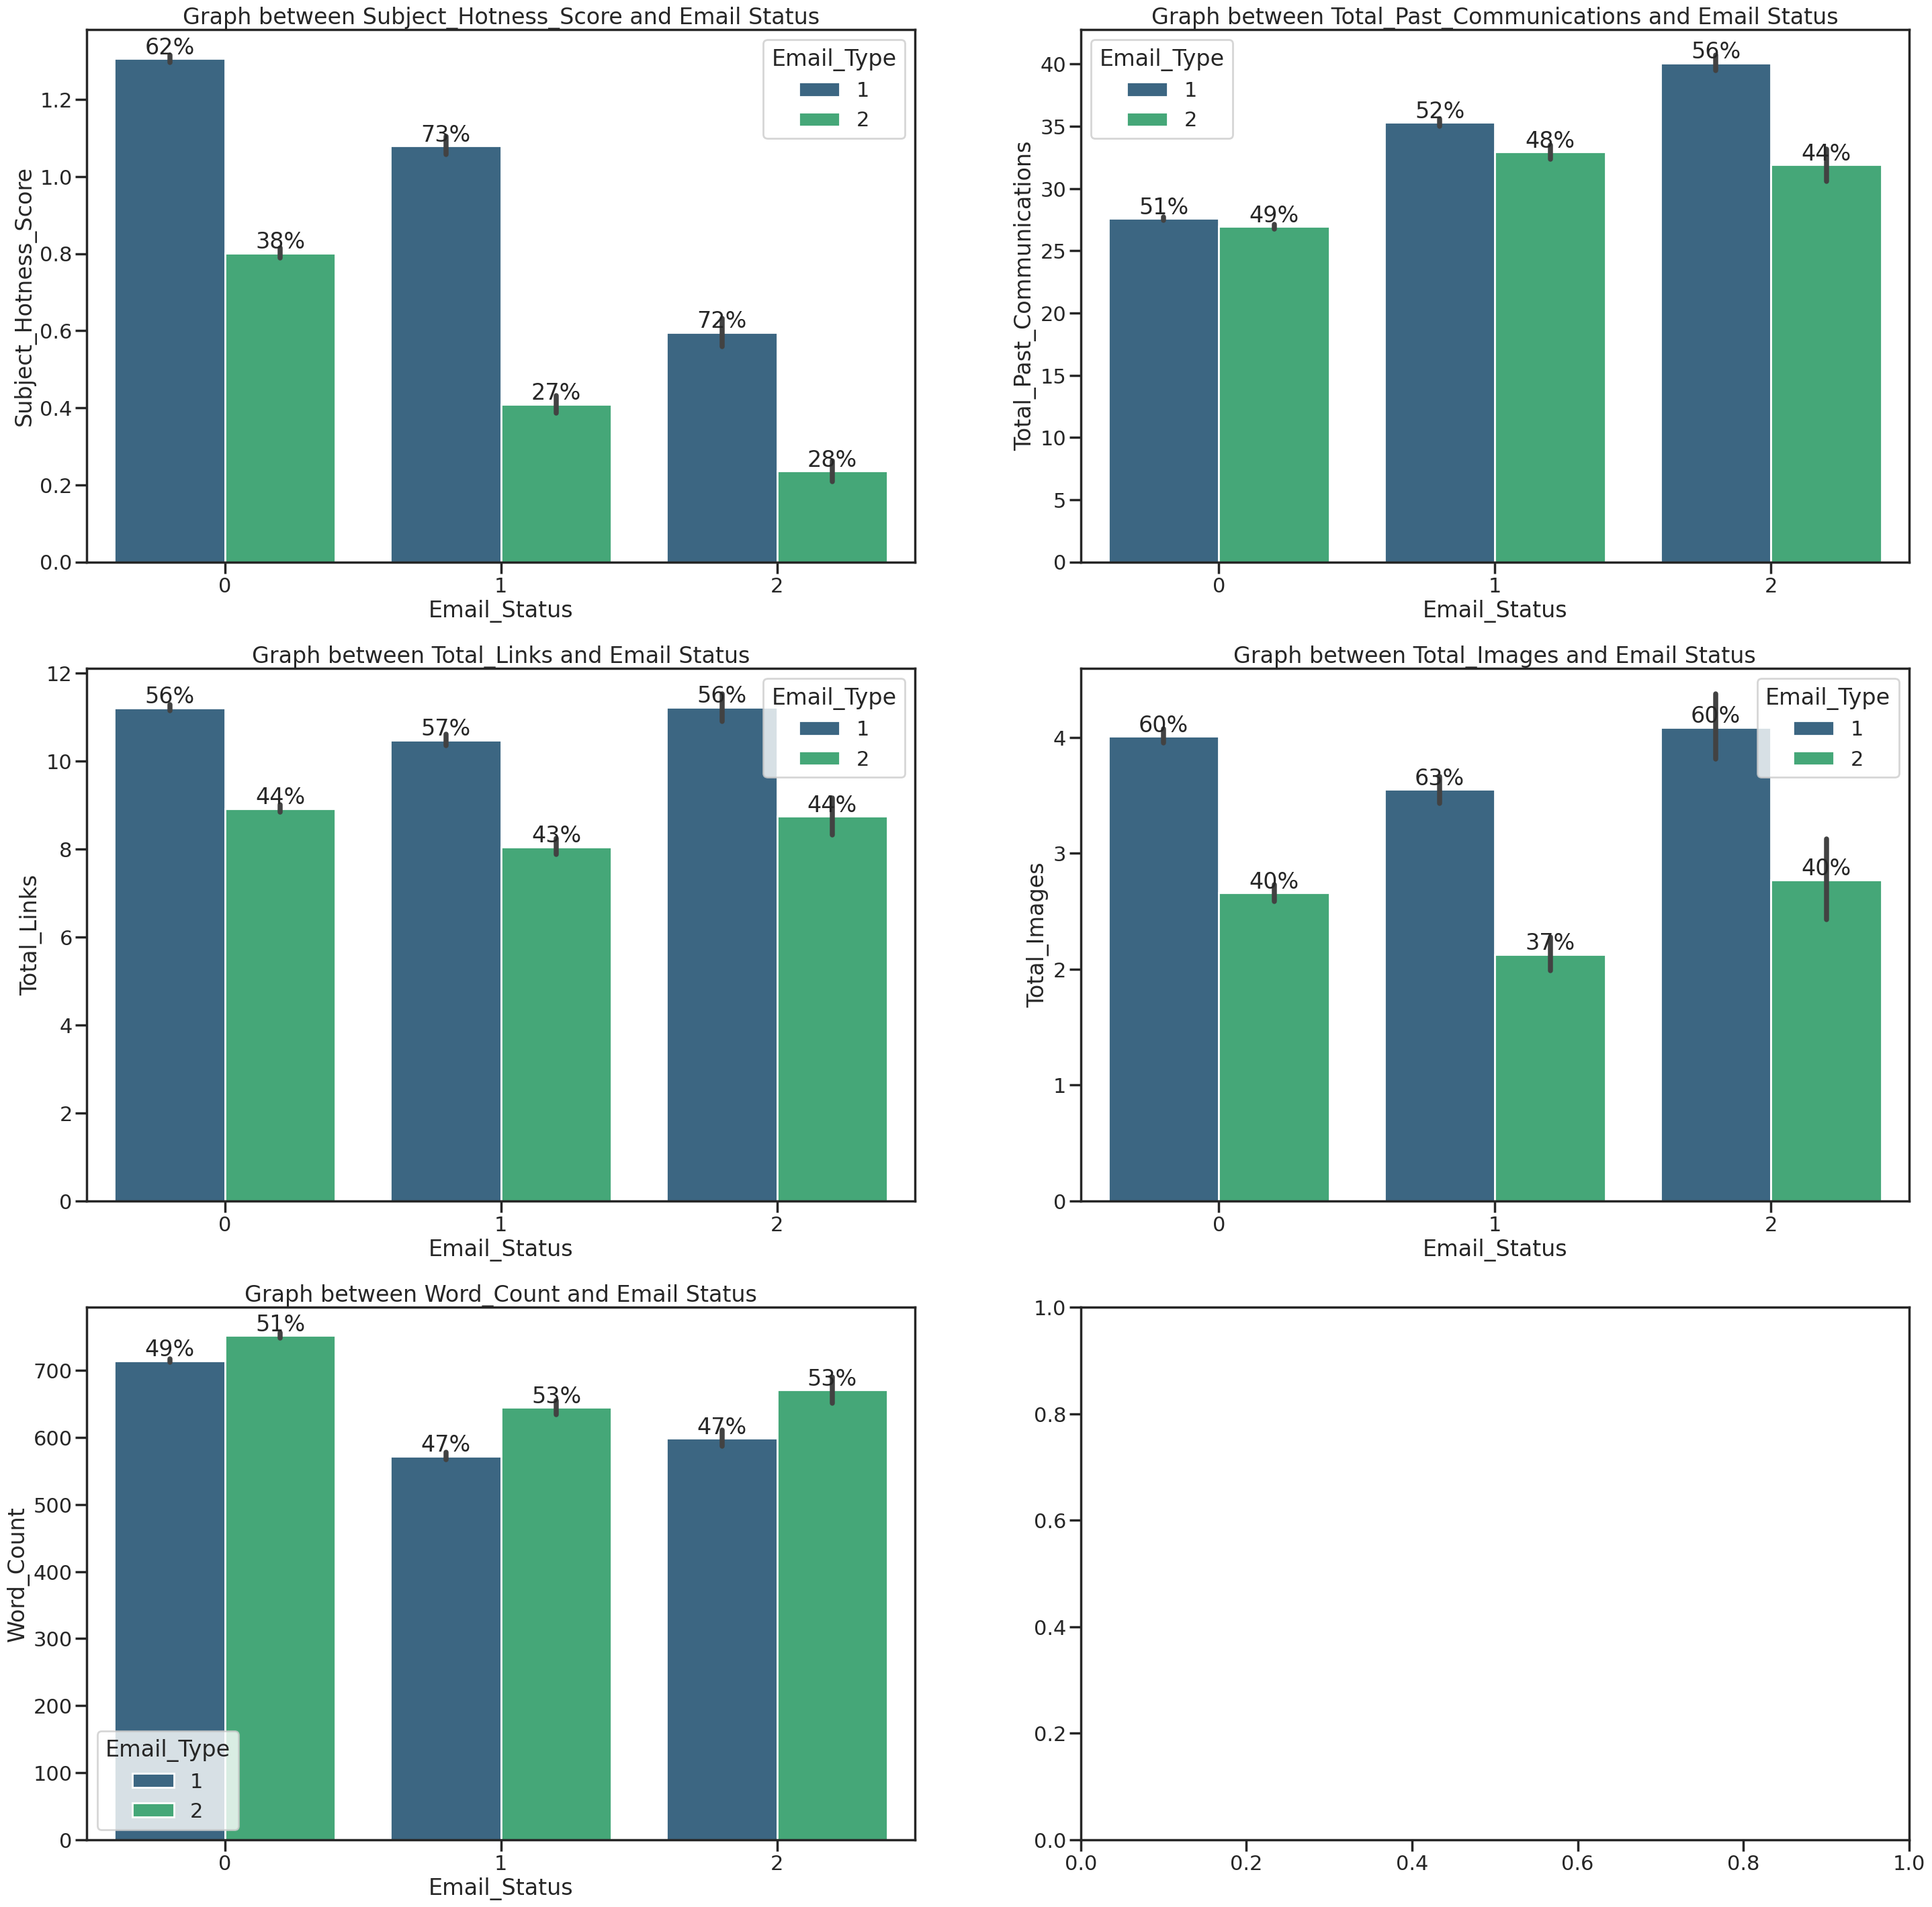

In [ ]:
# Chart - 4 visualization code
fig, axs = plt.subplots(3, 2,figsize=(35, 35))
# j and k is for iterating through axis in subplot
j=0
k=-1
for value in num_feature:
# Updating j and k for plotting on subplot
  k+=1
  if k>1:
    k=0
    j+=1

  ax = sns.barplot(data = email_df, x = 'Email_Status',y = value, hue = 'Email_Type', ax=axs[j, k],palette='viridis')
  unique = len([x for x in email_df['Email_Status'].unique()])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  # plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  # plt.title(value)

  # print('='*120)
  axs[j,k].set(title = f'Graph between {value} and Email Status')

##### 1. Why did you pick the specific chart?

Barplots are versatile tools that facilitate the understanding of both discrete and continuous data. They excel in displaying the frequency counts of values across various levels of a categorical or nominal variable and often incorporate additional statistics, such as percentages, to provide a more comprehensive view.

In this particular instance, a bar chart was employed to showcase the average percentage of Email types relative to Email status. This visual representation offers a clear and concise way to observe the distribution and relationship between different email types and their corresponding statuses, aiding in the interpretation and communication of these insights.

##### 2. What is/are the insight(s) found from the chart?

Based on the previous chart, type 2 emails had better engagement rates despite being sent at a lower volume compared to type 1 emails.
To achieve better engagement rates, it is important to increase past communication.
An average word count of 600, subject hotness score of 0.6, and an average of 10 links and 3 images included in the content can also improve engagement rates.

#### Chart - 5

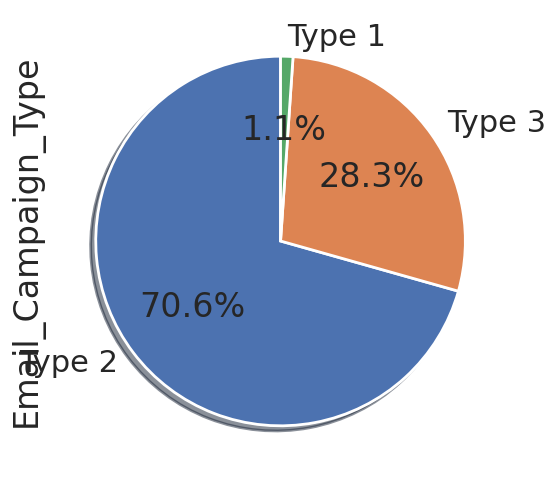

In [ ]:
#pie chart for distribution of each email campaign type
email_df['Email_Campaign_Type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Type 2','Type 3', 'Type 1'],
                              #  colors=['skyblue','red','green'],
                               explode=[0,0,0]
                              );

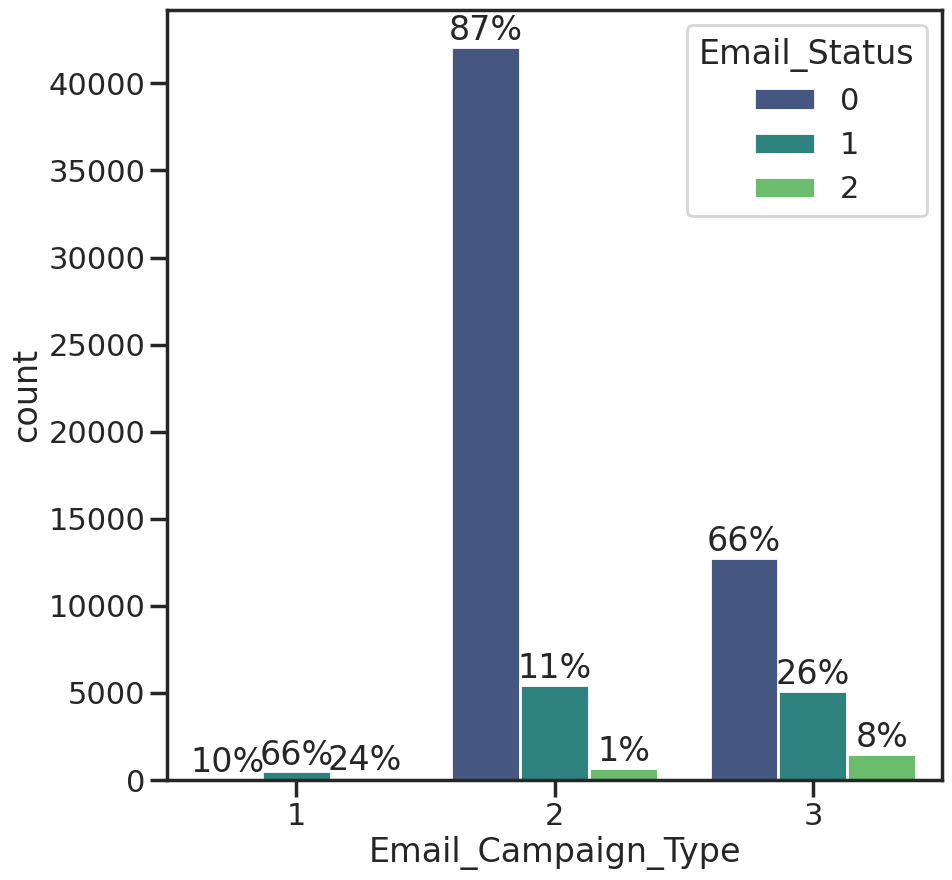

In [ ]:
#bar plot for understanding how email status is affected by campign type
plt.figure(figsize = (10,10))
ax = sns.countplot(x=email_df['Email_Campaign_Type'], hue=email_df['Email_Status'], palette='viridis')
unique = len([x for x in email_df['Email_Campaign_Type'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

Email Campaign 1, despite its relatively small quantity, exhibits a notably higher open rate compared to other campaigns. Conversely, Email Campaign Type 2 predominantly shows emails being ignored, with a minimal 1% acknowledgment rate.

These insights highlight the effectiveness of Email Campaign 1 in terms of capturing recipient attention, despite its lower volume. On the other hand, Email Campaign Type 2 appears to face challenges, with the majority of emails being ignored and only a marginal percentage acknowledged. Understanding these patterns is crucial for optimizing email campaigns and tailoring strategies to enhance engagement and response rates.

##### 2. What is/are the insight(s) found from the chart?

Are there any insights that lead to negative growth? Justify with specific reason.

The company should focus on increasing campaign type 1 as it has shown higher engagement compared to campaign type 2, which has a higher rate of ignored emails.

If a large number of emails are being ignored, it is better to discontinue that category. It is advisable to perform A/B testing on the content and other categories before sending them in bulk, as sending out large volumes of ignored emails can lead to revenue loss.



#### Chart - 6

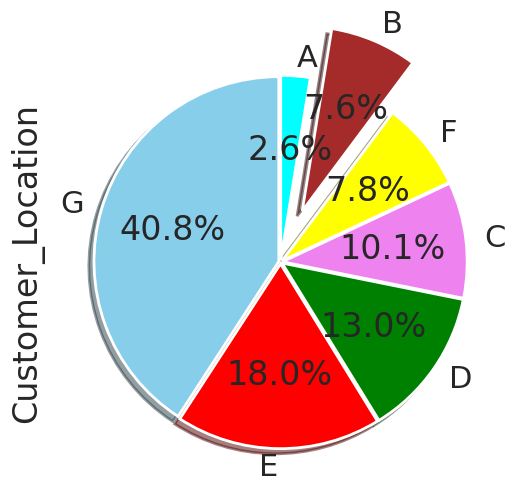

In [ ]:
#pie chart for distribution of each email campaign type
email_df['Customer_Location'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['G','E', 'D','C','F','B','A'],
                               colors=['skyblue','red','green','violet','yellow','brown','cyan','magenta'],
                               explode=[0.01,0.01,0.01,0.01,0.01,0.3,0.01]
                              );


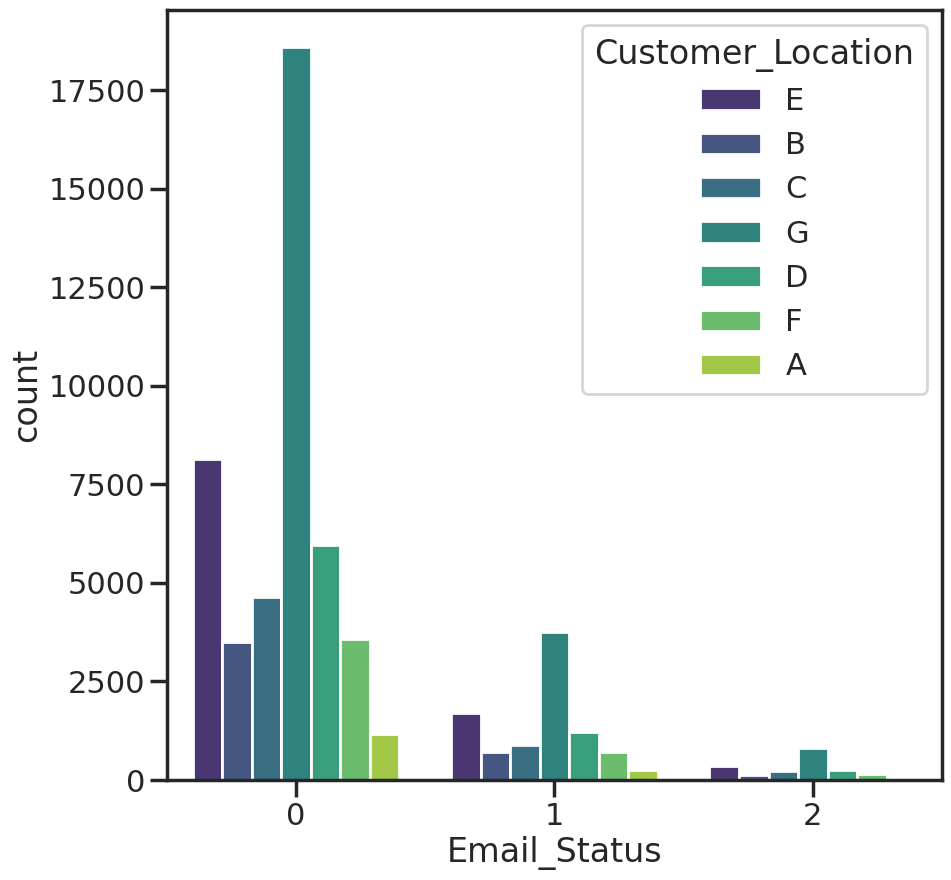

In [ ]:
#based on location identifying how email status changed
plt.figure(figsize = (10,10))
ax = sns.countplot(x=email_df['Email_Status'], hue=email_df['Customer_Location'], palette='viridis')
plt.show()


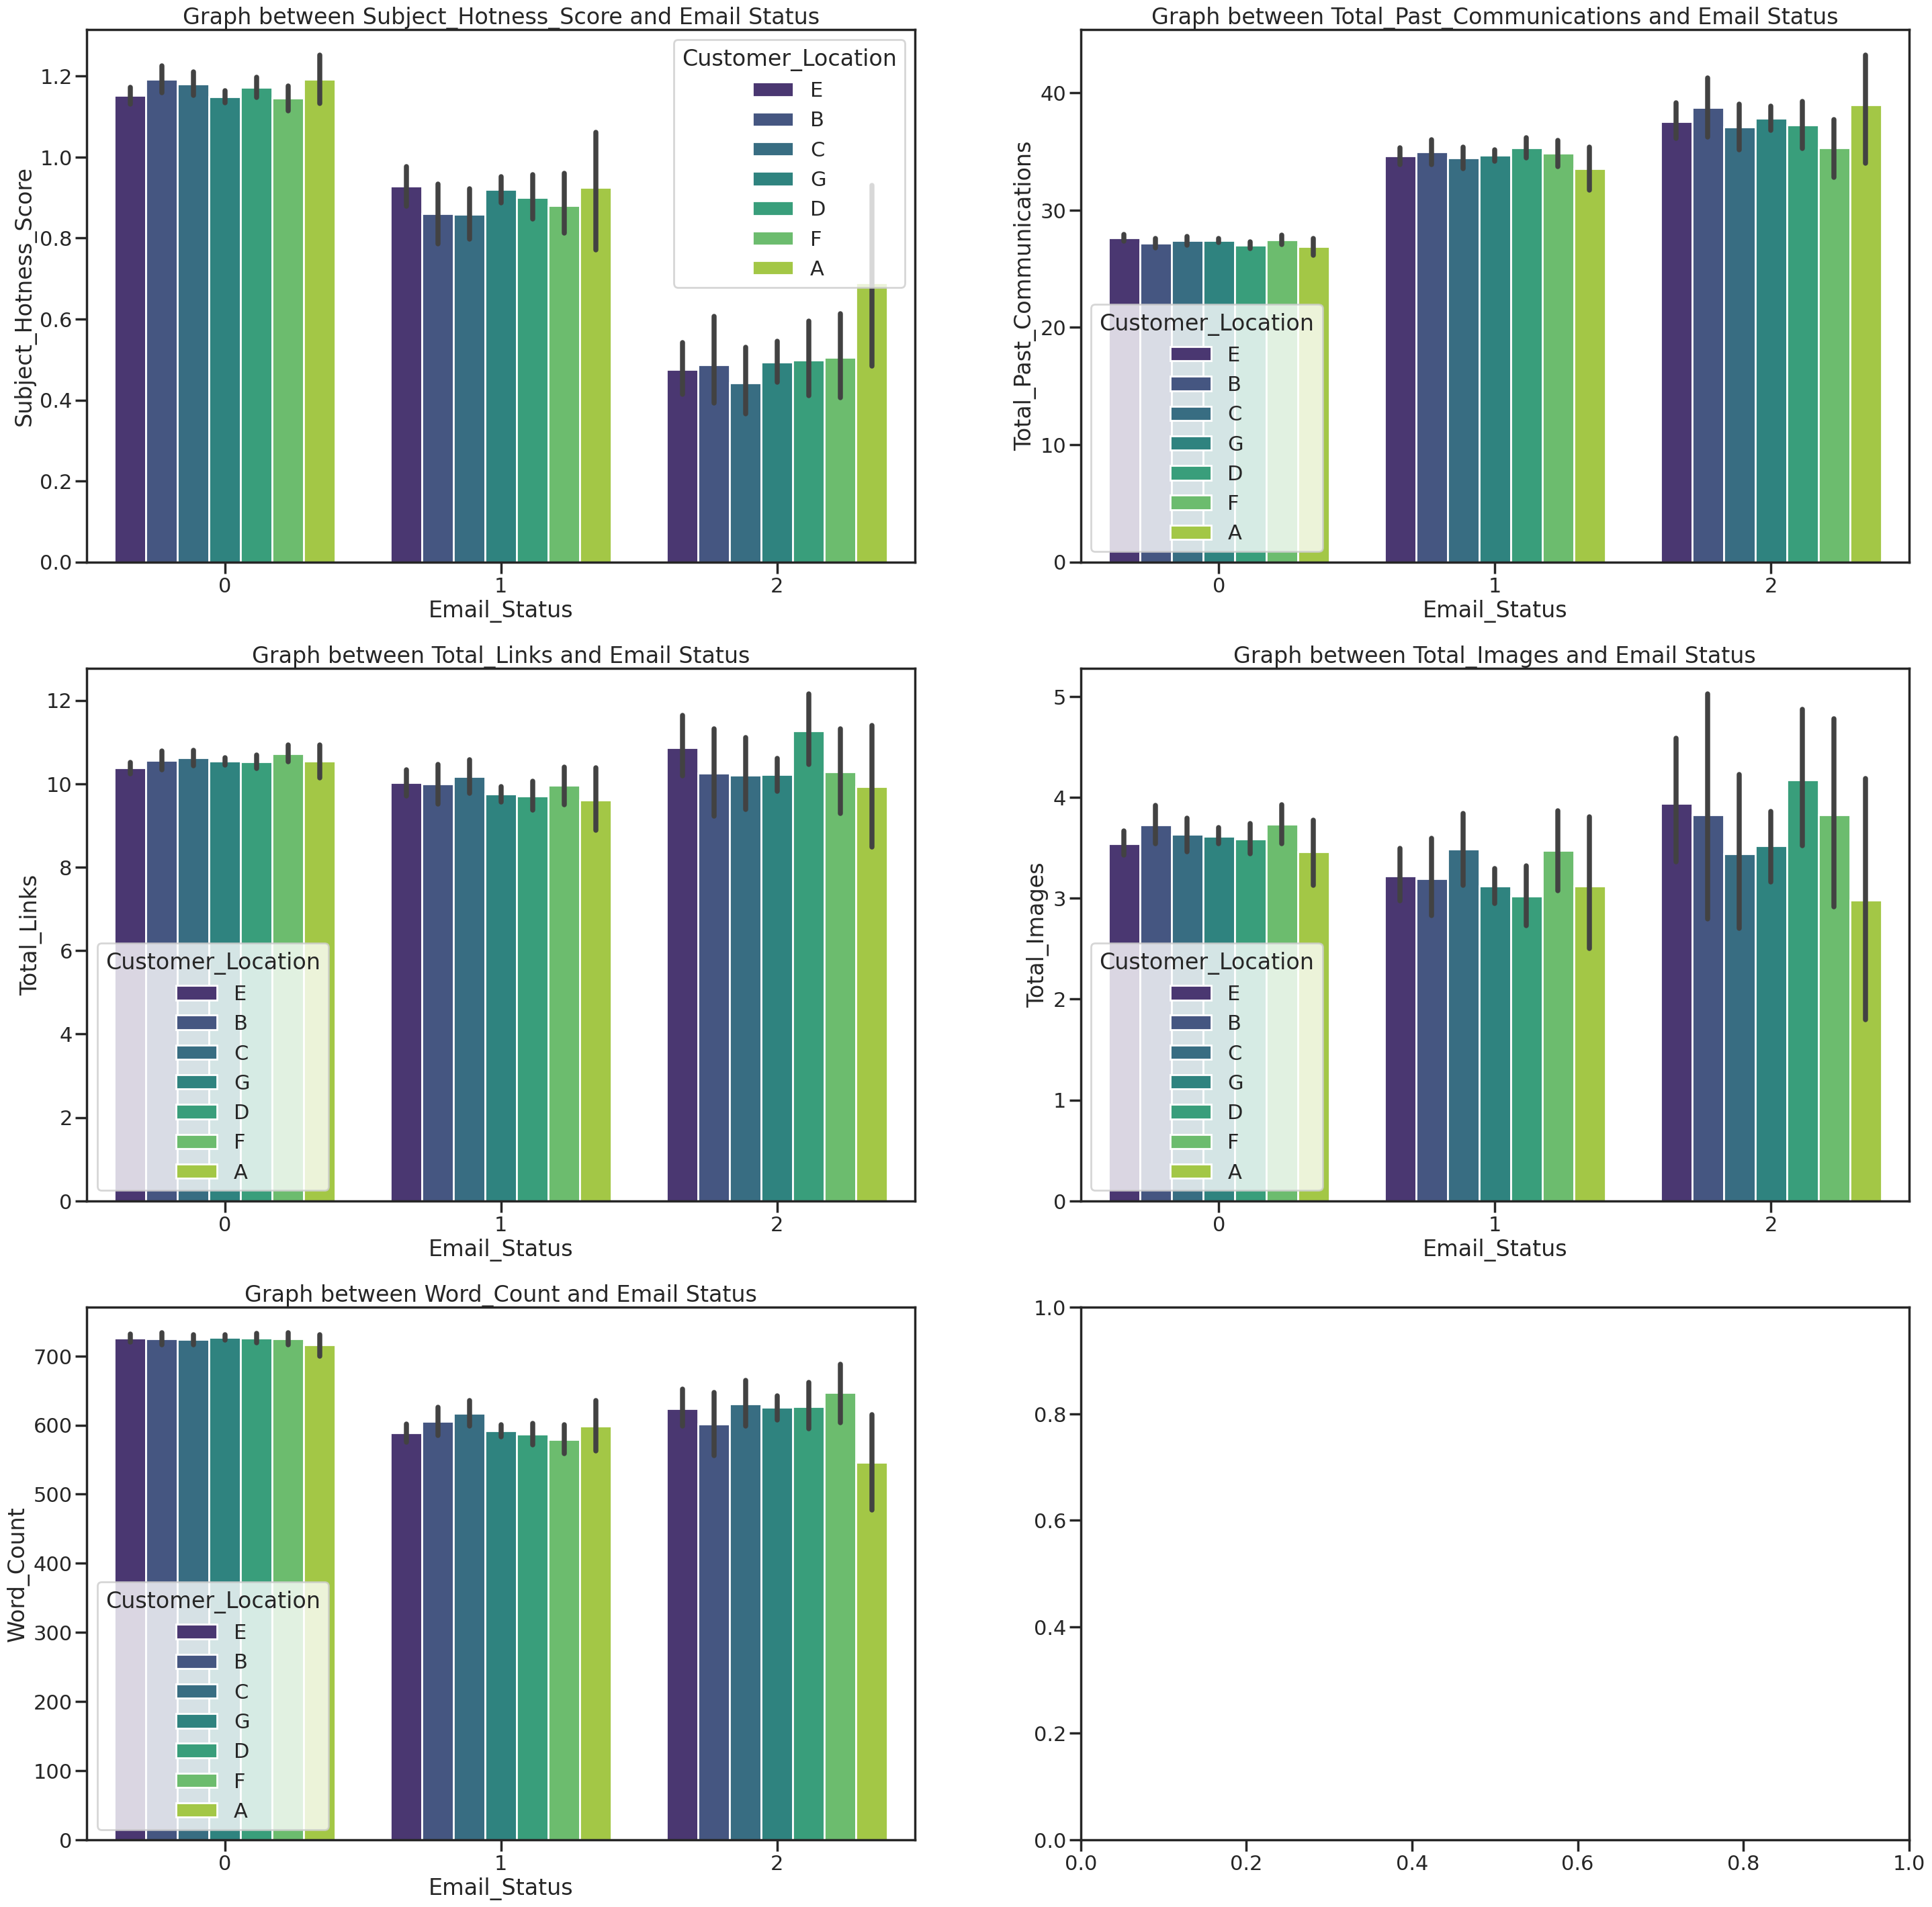

In [ ]:
#checking effect of location on other numerical features
fig, axs = plt.subplots(3, 2,figsize=(35, 35))
# j and k is for iterating through axis in subplot
j=0
k=-1
for value in num_feature:
# Updating j and k for plotting on subplot
  k+=1
  if k>1:
    k=0
    j+=1

  sns.barplot(data = email_df, x = 'Email_Status',y = value, hue = 'Customer_Location', ax=axs[j, k],palette='viridis')
  axs[j,k].set(title = f'Graph between {value} and Email Status')

##### 1. Why did you pick the specific chart?

Location C demonstrates the highest level of engagement, even though it receives a lower quantity of emails. This suggests that the communication with Location C is particularly effective, resulting in a higher percentage of emails being acknowledged. Despite the lower volume, the impact and responsiveness of the emails in Location C are notable, emphasizing the importance of considering both quantity and quality when assessing email campaign effectiveness.

##### 2. What is/are the insight(s) found from the chart?

Are there any insights that lead to negative growth? Justify with specific reason.

It is recommended to focus on sending more emails to Location C rather than Location G since a majority of the emails sent to Location G are being ignored, resulting in a lower percentage of acknowledged emails. While Location G may have more potential customers, the lower conversion rate may result in a loss of revenue.

#### Chart - 7

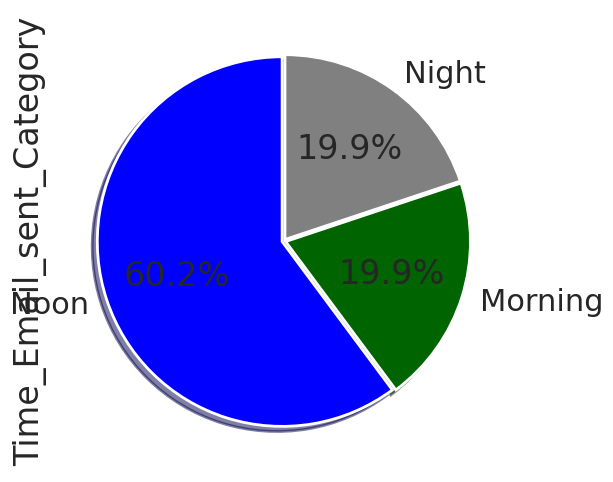

In [ ]:
#pie chart for distribution of email based on time period
email_df['Time_Email_sent_Category'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Noon','Morning', 'Night'],
                               colors=['blue','darkgreen','grey'],
                               explode=[0.01,0.01,0.01]
                              );

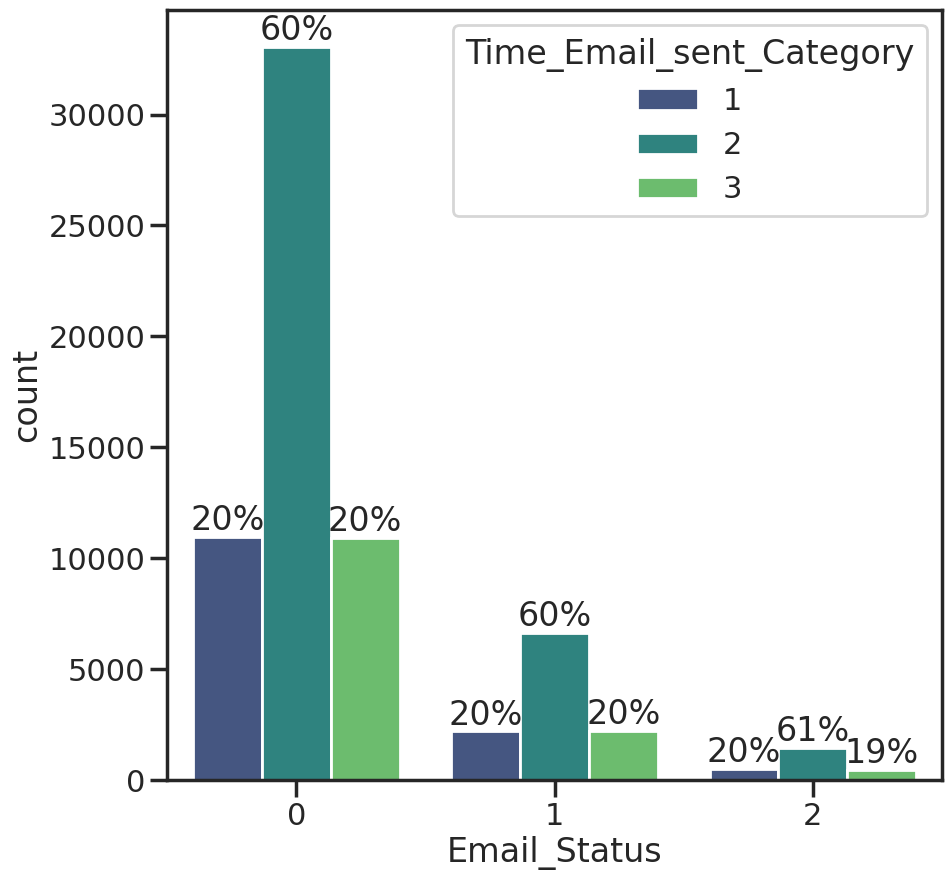

In [ ]:
#bar plot for understanding how email status is affected by Time_Email_sent
plt.figure(figsize = (10,10))
ax = sns.countplot(x=email_df['Email_Status'], hue=email_df['Time_Email_sent_Category'], palette='viridis')
unique = len([x for x in email_df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?


A significant portion, 60%, of the emails was sent during the afternoon, with 60% of those being ignored. In contrast, for the remaining 40% sent during this time, only 60% displayed an opened rate.

Interestingly, emails sent in the morning and night, despite having an equal percentage, overall received a higher acknowledgment rate. This suggests that the timing of email dispatch plays a crucial role, with morning and night emails showing a greater likelihood of being acknowledged compared to those sent during the afternoon.

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, there are insights that suggest a potential negative impact on growth. The data indicates that the timing of email delivery significantly influences its effectiveness. Morning and night emerge as favorable times, likely tied to users planning their day in the morning or preparing for the next day at night. This pattern results in higher levels of email acknowledgment during these periods.

Conversely, sending emails during the afternoon appears less effective, with a higher likelihood of being ignored. This disparity can lead to a lower percentage of acknowledged emails, potentially impacting conversion rates and incurring costs without proportional benefits. Therefore, optimizing the timing of email campaigns to align with customer preferences, as demonstrated by morning and night deliveries, is crucial for maximizing positive outcomes and minimizing the risk of negative growth.

#### Chart - 8

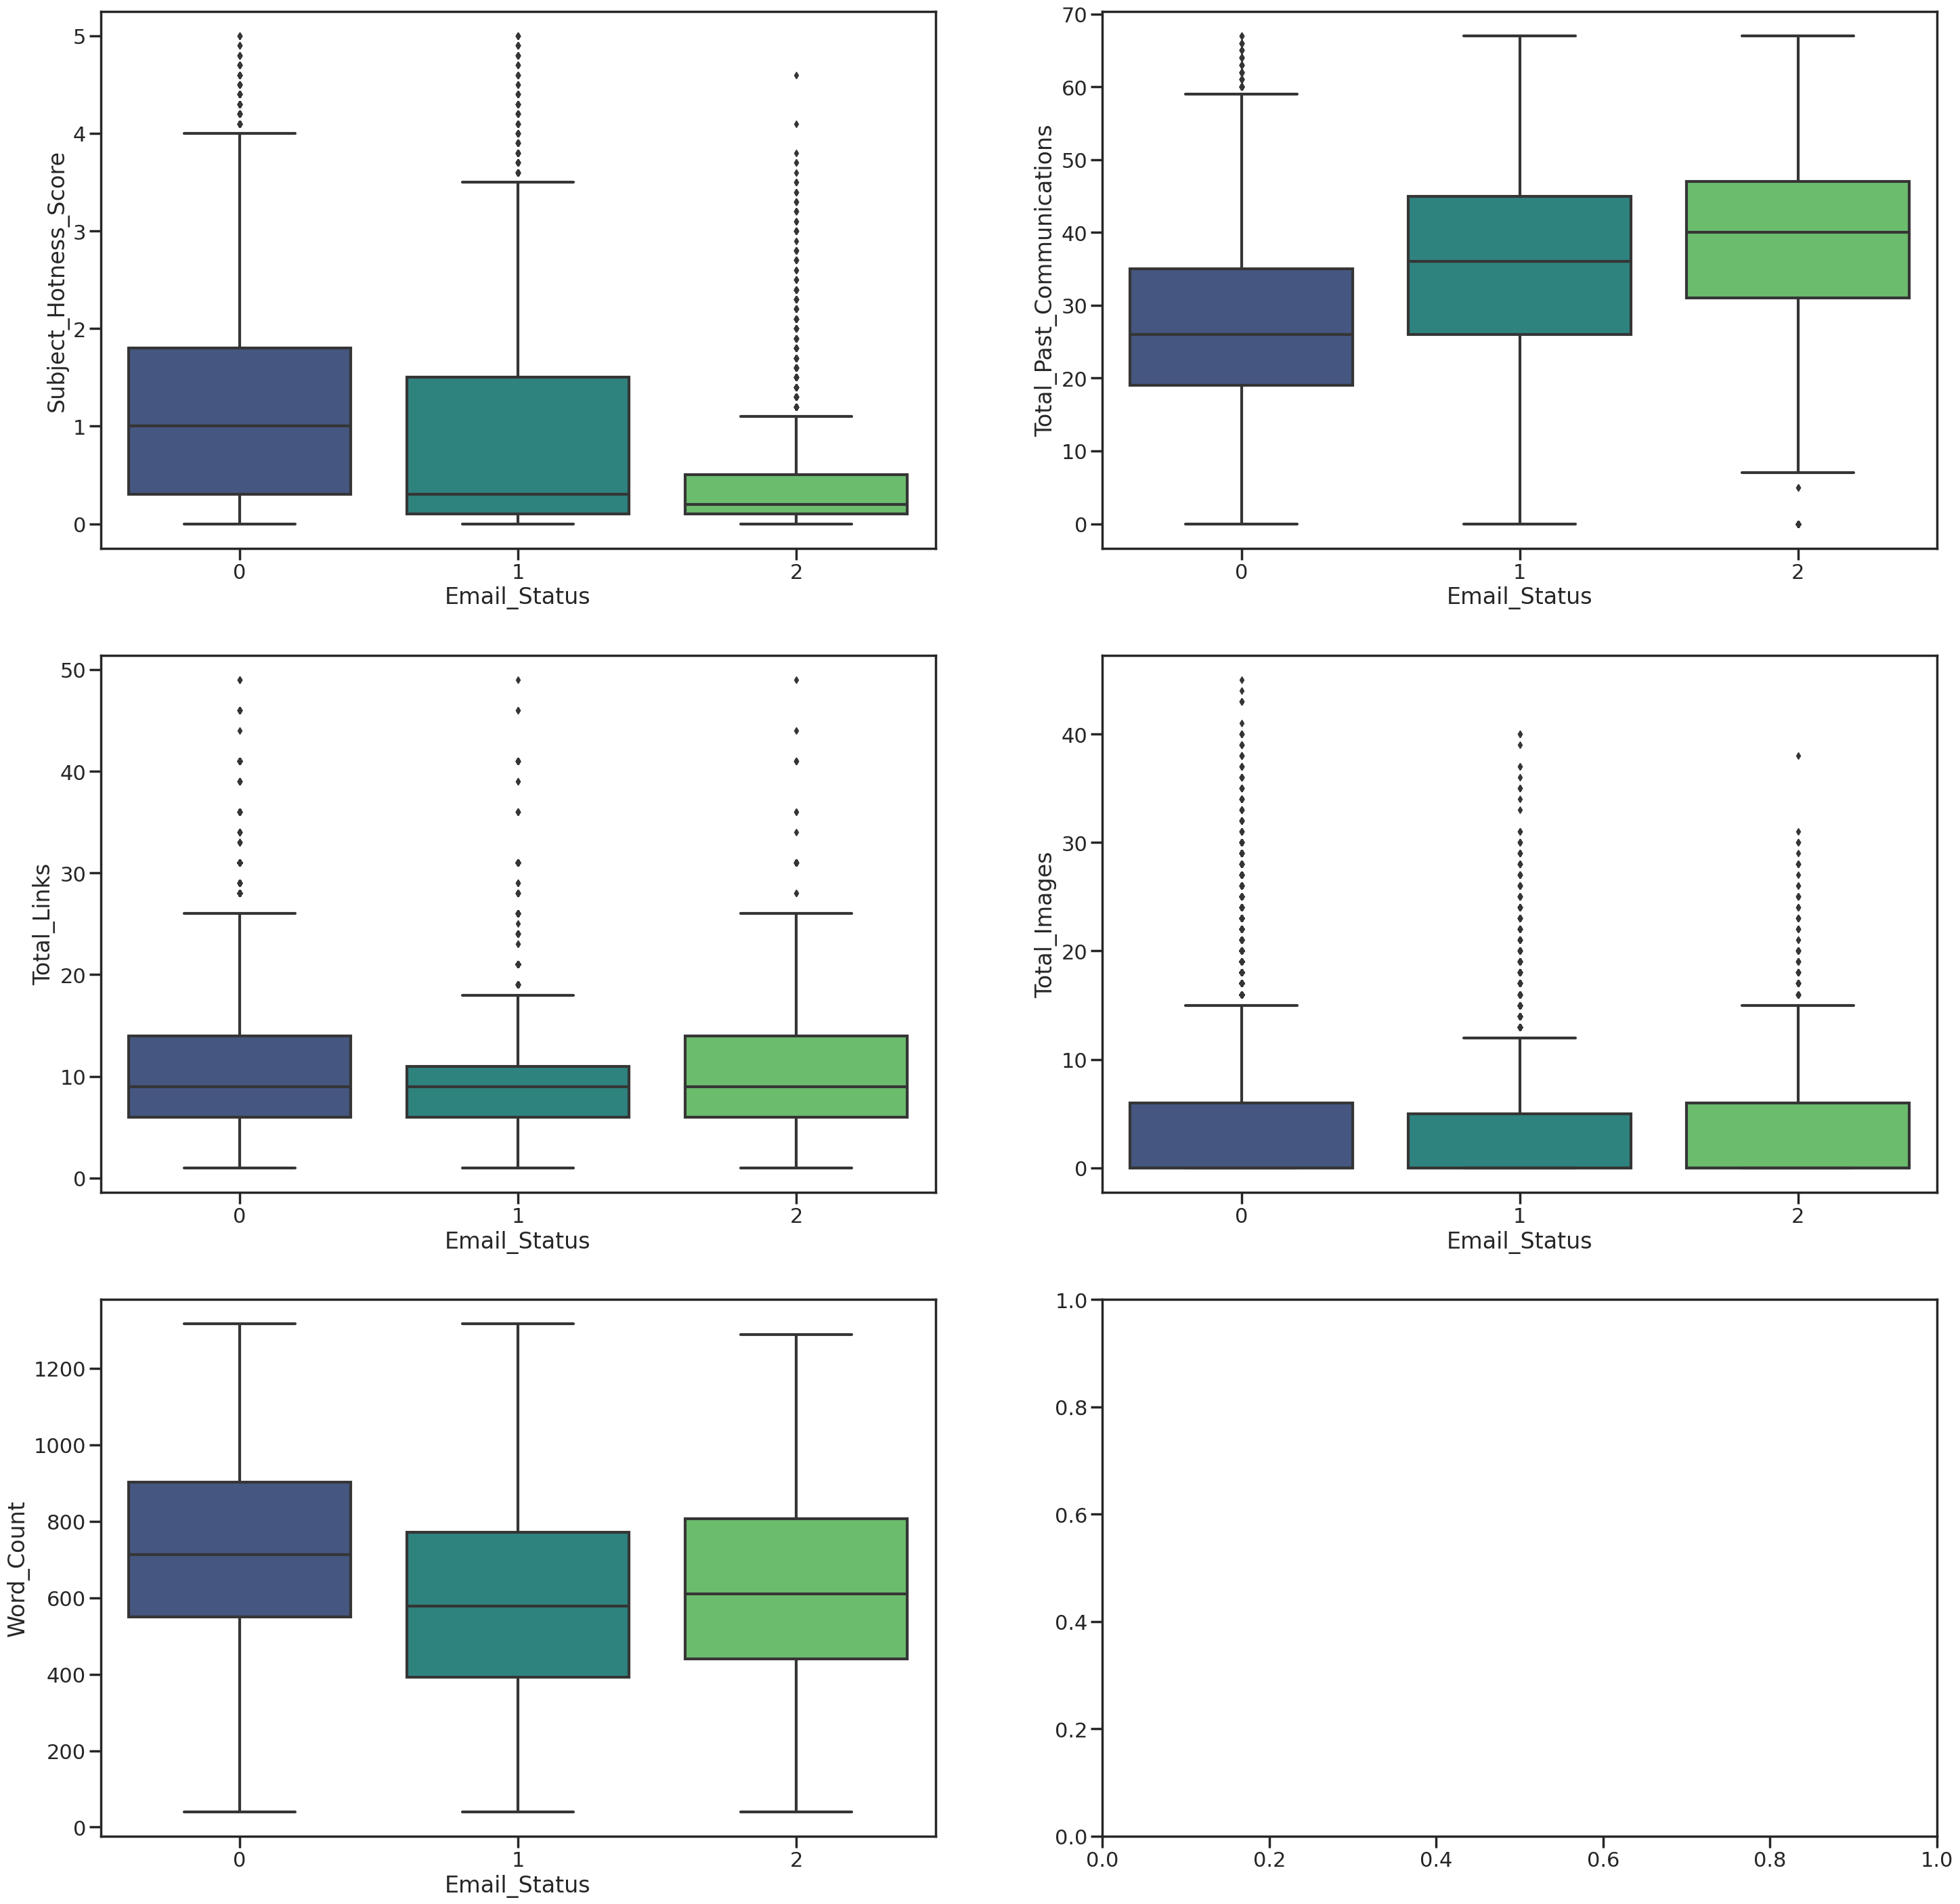

In [ ]:
#continuous variables through boxplots
fig, axs = plt.subplots(3, 2,figsize=(35, 35))
# j and k is for iterating through axis in subplot
j=0
k=-1
for value in num_feature:
# Updating j and k for plotting on subplot
  k+=1
  if k>1:
    k=0
    j+=1

  sns.boxplot(x=email_df['Email_Status'], y= email_df[value], ax=axs[j, k],palette='viridis')
plt.show()




##### 1. Why did you pick the specific chart?

Boxplots serve as valuable tools for visualizing the distribution of a dataset by displaying key summary statistics such as the median, quartiles, and potential outliers. Their effectiveness lies in their ability to facilitate comparisons of variable distributions across different categories or groups.

Additionally, boxplots are adept at identifying outliers or extreme values within the data. The graphical representation of the interquartile range and the whiskers in a boxplot makes it easier to spot values that fall significantly beyond the typical range, aiding in the detection of anomalies or unusual data points.

In summary, boxplots offer a concise and informative way to understand the spread and central tendencies of a dataset, making them particularly useful for exploratory data analysis and comparisons between different groups or categories.

##### 2. What is/are the insight(s) found from the chart?

In the subject hotness score, median of ignored emails was around 1 with a few outliers. Acknowledged emails has the most outliers. It is observed that the Subject_Hotness_Score for read and acknowledged emails are much lower.

Analyzing total past communications, we can see that the more the number of previous emails, the more it leads to read and acknowledged emails. This is just about making connection with your customers.

The more the words in an email, the more it has a tendency to get ignored. Too lengthy emails are getting ignored.

The median is kind of similar in all of the three cases in total links feature with a number of outliers.

More images were there in ignored emails.

There are considerable number of outliers in Subject_Hotness_Score, Total_Links and Total_Images.

#### Chart - 9

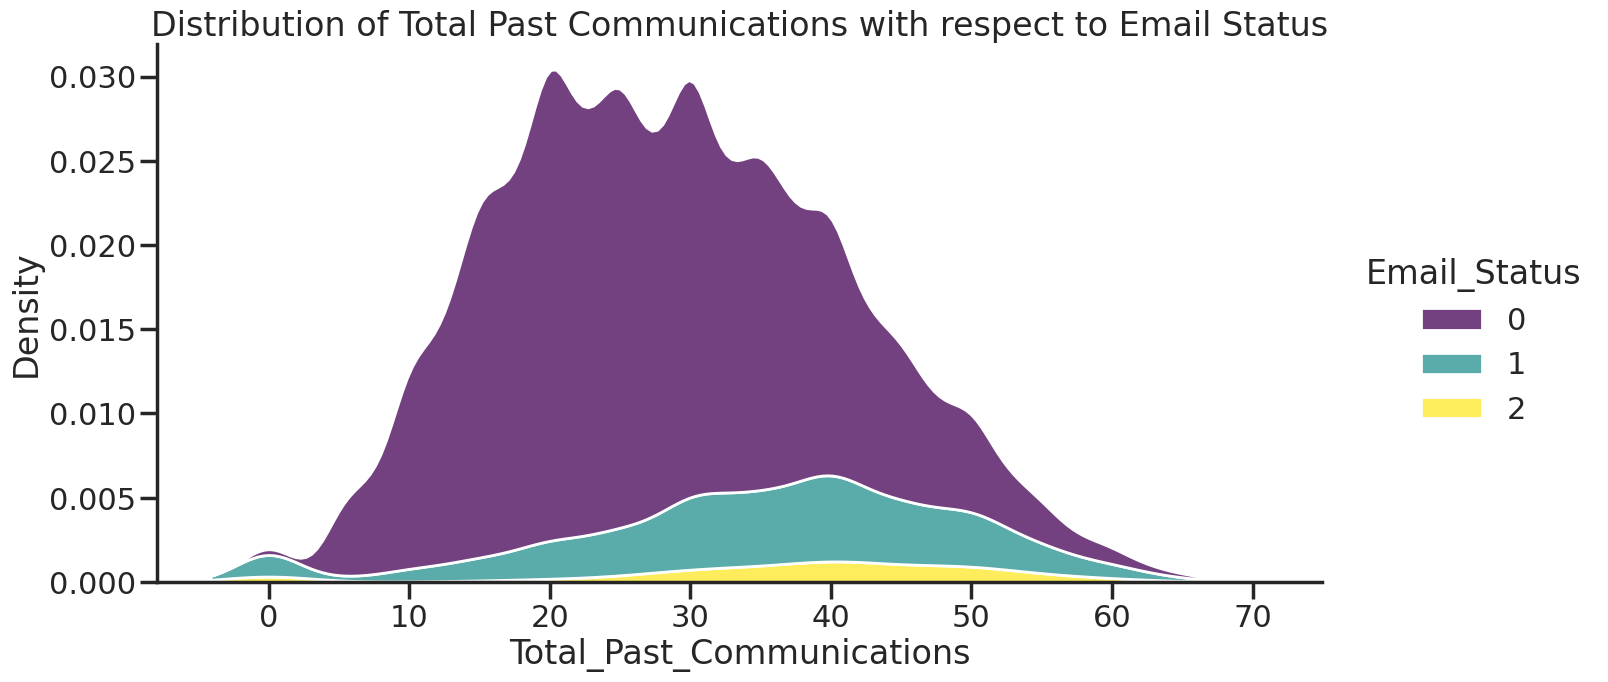

In [ ]:
ax = sns.displot(x='Total_Past_Communications', hue = 'Email_Status', data = email_df,
            kind = 'kde', height=7, aspect=2, multiple='stack', palette='viridis')

plt.title('Distribution of Total Past Communications with respect to Email Status')
plt.xlabel('Total_Past_Communications')
plt.show()

##### 1. Why did you pick the specific chart?

Stacked chart helps in comparing the probability density functions of multiple features.

##### 2. What is/are the insight(s) found from the chart?

It seems there might be a slight confusion in the terminology. A density plot typically illustrates the distribution of a continuous variable, showing the likelihood of different values. If you're referring to a scatter plot or another type of plot that involves both acknowledged and ignored emails against the number of communications, the statement would be more accurate.

For instance:
"The scatter plot clearly shows that the number of acknowledged emails tends to be higher than the number of ignored emails, suggesting a positive relationship between the number of acknowledged emails and the total number of communications."

Please clarify if you are referring to a specific type of plot or if you have additional details you'd like to include in the statement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights derived from a density plot alone may not provide conclusive evidence regarding negative growth or offer actionable insights for the business. While the plot indicates the distribution of data, it lacks specific details on the nature of communication or the effectiveness of marketing emails.

To assess the potential for negative growth, it is essential to delve deeper into the quality and impact of the communication strategy. Metrics such as open rates, click-through rates, and customer feedback are more relevant for evaluating the success of engagement efforts. The density plot, by itself, may not capture the nuances required to identify negative growth; therefore, a comprehensive analysis of additional relevant metrics is necessary for a more accurate assessment.

#### Chart - 10 - Correlation Heatmap

<Axes: >

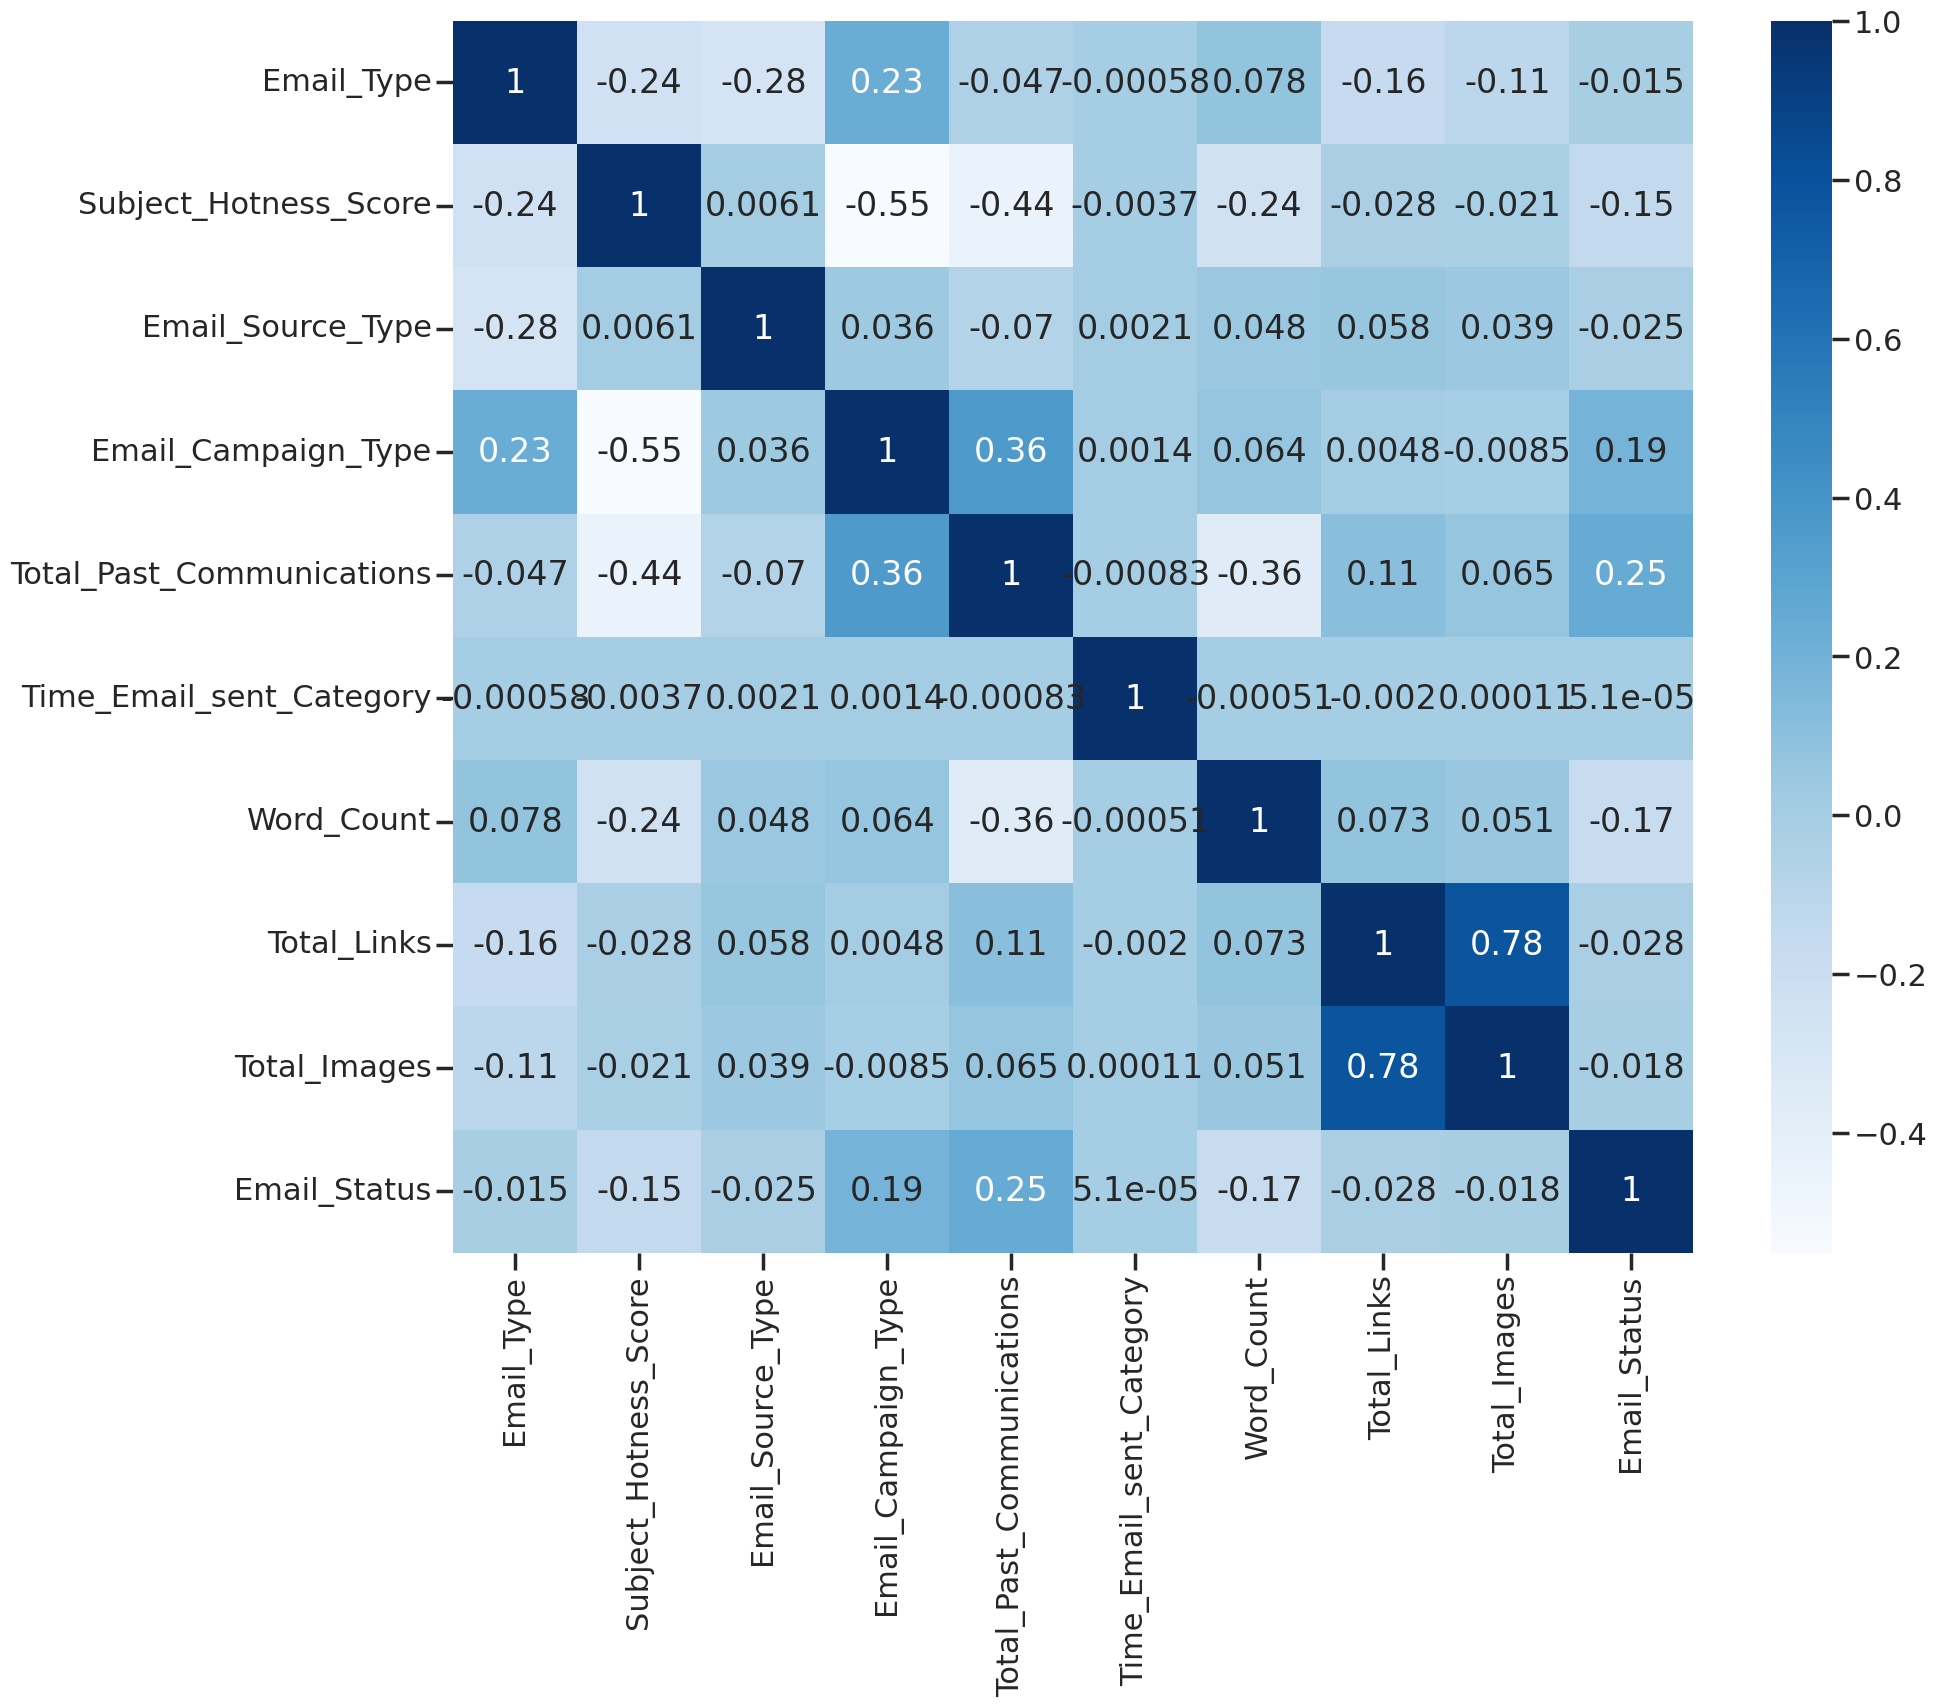

In [ ]:
# Correlation Heatmap visualization code
columns_to_drop = ['Email_ID','Customer_Location']
df = email_df.drop(columns_to_drop,axis=1)

plt.figure(figsize = (20,16))
sns.heatmap(df.corr(), annot=True, cmap = 'Blues')

##### 1. Why did you pick the specific chart?

Heatmaps are instrumental for visualizing intricate data and uncovering patterns within a dataset, particularly when dealing with numerous variables. Their primary purpose is to facilitate the identification of correlations, trends, and anomalies in the data.

These visualizations are widely utilized in various fields, including data analysis, business intelligence, and scientific research, where large and complex datasets require effective exploration. By representing data values with colors on a two-dimensional grid, heatmaps allow for the quick recognition of relationships and variations, making them valuable tools for gaining meaningful insights from extensive and intricate datasets.

##### 2. What is/are the insight(s) found from the chart?

Correlation matrix justifies our earlier hypotheses. Email Campaign Type and Total past communication shows positive correlation with emails being read and acknowledged. Word Count and Subject Hotness score are the most negatives amongst other. We can see multicollinearity involved in Email Campaign Type, Total past communication and Total links, Total Images among others and we will have to deal with it.

#### Chart - 11 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, hue="Email_Status", palette='viridis');


Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

A pair plot is a visualization tool used to display pairwise relationships between variables in a dataset. It provides a matrix of scatterplots, histograms, or other visual representations that show how each variable relates to every other variable in the dataset.

The pair plot is especially valuable for identifying patterns and correlations between variables, aiding in the understanding of the relationships within the data. This visualization is particularly useful in identifying which variables may be most relevant in predicting the target variable in a predictive modeling context.

Pair plots are commonly employed in exploratory data analysis to gain an initial understanding of the data's structure and distribution. They are also beneficial in the early stages of model building, helping researchers and data scientists make informed decisions about feature selection and potential relationships that may influence the modeling process.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

The statements suggest expectations of no significant impact between certain variables in the dataset. It's important to note that these are hypotheses or assumptions that would need to be tested using statistical methods. Without conducting a formal statistical analysis, such as hypothesis testing or correlation studies, it cannot be definitively stated whether these relationships are significant or not.

For example:

1. **Email_Type and Email_Status:**
   The hypothesis here is that the type of email campaign will not significantly impact the email status. To confirm or reject this hypothesis, statistical analysis, like chi-square tests or logistic regression, could be conducted on the data.

2. **Subject_Hotness_Score and Total_Past_Communications:**
   The hypothesis is that there is no significant impact of the subject hotness score on the total past communications. Again, statistical tests, perhaps correlation analysis, could be employed to explore the relationship between these variables.

3. **Customer_Location, Total_Links, and Total_Images:**
   The assumption is that customer location will not significantly impact the total links and total images in the email. Statistical tests or regression analyses could be performed to validate or refute this hypothesis.

It's crucial to employ appropriate statistical methods to test such assumptions and draw valid conclusions about the significance of relationships between variables in the dataset.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no statistically significant relationship between Email_Type and Email_Status (B1 = 0).
Alternative Hypothesis (H1): There is a statistically significant relationship between Email_Type and Email_Status (B1 ≠ 0).
Test Type: Chi-square test.

These hypotheses posit that the coefficient (B1) representing the relationship between Email_Type and Email_Status is equal to zero in the null hypothesis, suggesting no relationship. The alternative hypothesis contends that the coefficient is not equal to zero, indicating the presence of a statistically significant relationship. The chosen test for evaluation is the chi-square test, commonly used to assess the independence of categorical variables, such as Email_Type and Email_Status.

#### 2. Perform an appropriate statistical test.

In [ ]:

# Perform Statistical Test to obtain P-Value

# perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(email_df['Email_Type'], email_df['Email_Status']))

if p_value < 0.05:
    print("Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status")
else:
    print("Fail to reject the null hypothesis - the Email_Type does not have a significant impact on the Email_Status")

Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I employed the chi-square test of independence—a statistical method designed to assess whether a significant association exists between two categorical variables. In the specific context of this hypothesis, the categorical variables under examination are Email_Type and Email_Status. The chi-square test is utilized to determine whether the observed distribution of these variables deviates significantly from what would be expected if there were no association between them. The results of this test help evaluate the presence or absence of a statistically significant relationship between Email_Type and Email_Status.

##### Why did you choose the specific statistical test?

The choice of the chi-square test is fitting for this analysis due to the categorical nature of the variables in question—Email_Type and Email_Status. The chi-square test of independence is specifically designed for assessing relationships between categorical variables. By comparing the observed distribution of these variables with what would be expected under the assumption of independence, the test provides valuable insights into whether a significant relationship exists. This method is particularly well-suited for examining associations between two categorical variables, making it an appropriate and effective statistical tool for your hypothesis regarding Email_Type and Email_Status.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The null hypothesis (H0) posits that there is no linear relationship between Subject_Hotness_Score and Total_Past_Communications, symbolized as ρ (rho) = 0. Conversely, the alternative hypothesis (H1) contends that there is a linear relationship between these two variables, denoted as ρ ≠ 0. The chosen test for evaluation is Pearson's correlation test.

In essence, the goal of this statistical analysis is to determine whether there is a significant correlation between the Subject_Hotness_Score and Total_Past_Communications. The correlation coefficient (ρ) will be assessed to ascertain the strength and direction of any observed linear relationship.

#### 2. Perform an appropriate statistical test.

In [ ]:
#to perform the test, variable I used has null or infinity values, therefore creating copy and treating those
data = df.copy()
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.mean())


In [ ]:
# Perform Statistical Test to obtain P-Value
# perform correlation test
r, p_value = stats.pearsonr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])

if p_value < 0.05:
    print("Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("Fail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")



Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


In [ ]:
# perform non-parametric Spearman's rank correlation test
rho, p_value = stats.spearmanr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])

if p_value < 0.05:
    print("Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("Fail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")


Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


##### Which statistical test have you done to obtain P-Value?

. The Pearson's correlation test is indeed appropriate for assessing the linear correlation between two continuous variables. In the context of your hypothesis, Subject_Hotness_Score and Total_Past_Communications are continuous variables, and Pearson's correlation test will quantify the strength and direction of their linear relationship.

This statistical test returns a correlation coefficient (ρ), which ranges from -1 to 1. A positive value indicates a positive linear relationship, while a negative value indicates a negative linear relationship. The magnitude of the coefficient signifies the strength of the correlation, with 0 indicating no linear correlation.

After performing the test, the results can be interpreted to determine whether there is a statistically significant linear relationship between Subject_Hotness_Score and Total_Past_Communications. If the p-value is below a chosen significance level (e.g., 0.05), you may reject the null hypothesis and conclude that there is a significant linear correlation between the two variables.

##### Why did you choose the specific statistical test?

Pearson's correlation test is highly suitable when you are dealing with continuous variables and seeking to assess whether there is a linear relationship between them. This test provides valuable insights into the direction and strength of the linear correlation, helping you understand how changes in one variable correspond to changes in the other.

The test is particularly useful when you want to quantify the degree to which the values of Subject_Hotness_Score and Total_Past_Communications move together or in opposite directions. If the correlation is statistically significant, it indicates that the linear relationship is not likely due to random chance.

Your choice of Pearson's correlation test aligns well with your objective of exploring the linear association between these continuous variables.



### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 The null hypothesis (H0) posits that the mean of Total_Links is equal across all locations (A, B, C, D, E, F, G), represented as μ1 = μ2 = μ3 = μ4 = μ5 = μ6 = μ7. The alternative hypothesis (H1) suggests that at least one mean is different from the others (μ1 ≠ μ2 ≠ μ3 ≠ μ4 ≠ μ5 ≠ μ6 ≠ μ7).

The ANOVA test is well-suited for comparing means across multiple groups, making it an appropriate choice for your scenario where you want to determine if there are significant differences in the mean Total_Links among different locations. After conducting the ANOVA test, if the p-value is below a chosen significance level (e.g., 0.05), you may reject the null hypothesis and conclude that there is sufficient evidence to suggest that at least one location has a different mean Total_Links compared to the others.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(email_df[email_df['Customer_Location'] == 'A']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'B']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'C']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'D']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'E']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'F']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")



Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


In [ ]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(email_df[email_df['Customer_Location'] == 'A']['Total_Images'],
                                  email_df[email_df['Customer_Location'] == 'B']['Total_Images'],
                                  email_df[email_df['Customer_Location'] == 'C']['Total_Images'],
                                  email_df[email_df['Customer_Location'] == 'D']['Total_Images'],
                                  email_df[email_df['Customer_Location'] == 'E']['Total_Images'],
                                  email_df[email_df['Customer_Location'] == 'F']['Total_Images'],
                                  email_df[email_df['Customer_Location'] == 'G']['Total_Images'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Images in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Images in the email")



Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Images in the email


In [ ]:
# perform Kruskal-Wallis test
stat, p_value = stats.kruskal(email_df[email_df['Customer_Location'] == 'A']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'B']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'C']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'D']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'E']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'F']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")



Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


##### Which statistical test have you done to obtain P-Value?

In this hypothesis, I opted for the ANOVA (Analysis of Variance) test as it is a statistical tool designed to assess whether there exists a statistically significant difference in the means among two or more groups. The ANOVA test is particularly well-suited for scenarios where the goal is to compare means across multiple groups and ascertain whether the observed variability is greater than what would be expected by random chance.

##### Why did you choose the specific statistical test?

This test is used to determine if there are significant differences between the means of two or more groups. In this case, we have different locations (A,B,C,D,E,F,G) and we want to determine if there is a significant difference in the mean of Total_Links among these groups. ANOVA is appropriate for this case because the variable Total_Links is continuous and we want to compare the means of multiple groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
print(df.head())
try:
    value = df['Email_Type']
except KeyError as e:
    print(f"KeyError: {e}. Column not found in DataFrame.")


   Email_Type  Subject_Hotness_Score  Email_Source_Type  Email_Campaign_Type  \
0           1                   2.20                  2                    2   
1           2                   2.10                  1                    2   
2           2                   0.10                  1                    3   
3           1                   3.00                  2                    2   
4           1                   0.00                  2                    3   

   Total_Past_Communications  Time_Email_sent_Category  Word_Count  \
0                      33.00                         1         440   
1                      15.00                         2         504   
2                      36.00                         2         962   
3                      25.00                         2         610   
4                      18.00                         2         947   

   Total_Links  Total_Images  Email_Status  
0         8.00          0.00             0  
1       

#### What all missing value imputation techniques have you used and why did you use those techniques?

We observe a significant presence of null values in several columns, notably in "Customer Location," "Total Past Communications," "Total Links," and "Total Images." The "Customer Location" column, being categorical, poses challenges for straightforward imputation based on our understanding of customer locations. To gauge its impact on our target variable and discern any correlation, we'll conduct an analysis to determine whether specific locations are associated with the target variable or exhibit no correlation at all. Meanwhile, we'll proceed to address the null values in the other columns through appropriate filling methods. This approach allows us to make informed decisions regarding "Customer Location" based on its impact on the target variable, ensuring a comprehensive strategy for handling missing data.

<Axes: ylabel='Density'>

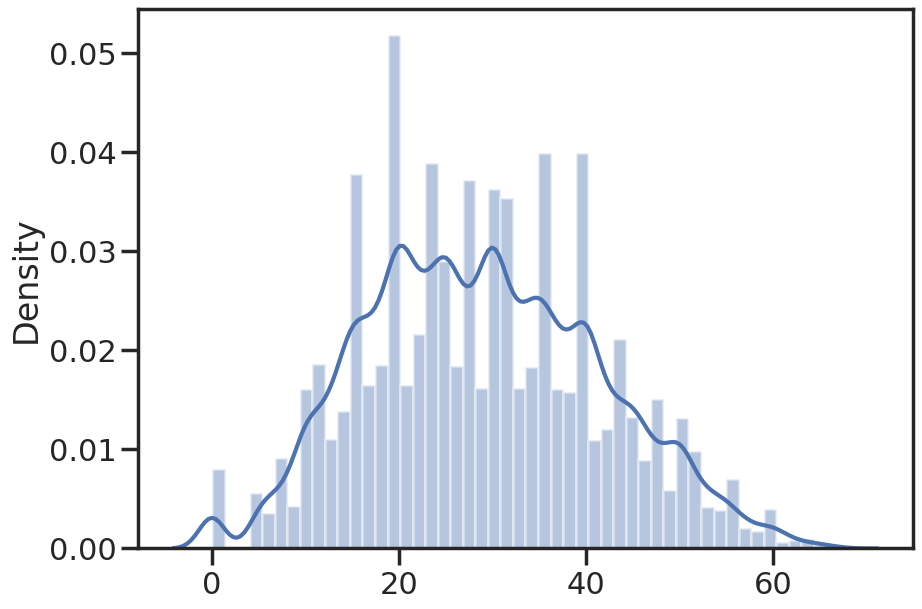

In [ ]:
#let's see the distribution of Total Past Communications to get what majority of the data tends to so that we can fill it accordingly
plt.figure(figsize = (10,7))
sns.distplot(x=email_df['Total_Past_Communications'], hist = True)

In [ ]:
#filling up the null values for total past comm
email_df['Total_Past_Communications'].fillna(email_df['Total_Past_Communications'].mean(), inplace = True)

In [ ]:
#let's see the distribution of Total Links to get what majority of the data tends to so that we can fill it accordingly
print(df.columns)
print(df.head())
# Check if 'Total_Links' is in the DataFrame columns
if 'Total_Links' in df.columns:
    # Access the column if it exists
    total_links_column = df['Total_Links']
    # Continue with your code using total_links_column
else:
    # Handle the case where 'Total_Links' is not in the DataFrame
    print("Column 'Total_Links' not found in the DataFrame.")


Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')
   Email_Type  Subject_Hotness_Score  Email_Source_Type  Email_Campaign_Type  \
0           1                   2.20                  2                    2   
1           2                   2.10                  1                    2   
2           2                   0.10                  1                    3   
3           1                   3.00                  2                    2   
4           1                   0.00                  2                    3   

   Total_Past_Communications  Time_Email_sent_Category  Word_Count  \
0                      33.00                         1         440   
1                      15.00                         2         504   
2                      36.00                         2   

In [ ]:
#filling up the Total Links Column
print(df.head())
df.columns = df.columns.str.strip()
# Safely access the column using .get() method

total_links_column = df.get('Total_Links')
if total_links_column is not None:
    # Continue with your code
    print(total_links_column.head())  # Example: Print the first few values of the column
else:
    print("Column 'Total_Links' not found in the DataFrame.")




   Email_Type  Subject_Hotness_Score  Email_Source_Type  Email_Campaign_Type  \
0           1                   2.20                  2                    2   
1           2                   2.10                  1                    2   
2           2                   0.10                  1                    3   
3           1                   3.00                  2                    2   
4           1                   0.00                  2                    3   

   Total_Past_Communications  Time_Email_sent_Category  Word_Count  \
0                      33.00                         1         440   
1                      15.00                         2         504   
2                      36.00                         2         962   
3                      25.00                         2         610   
4                      18.00                         2         947   

   Total_Links  Total_Images  Email_Status  
0         8.00          0.00             0  
1       

<Axes: ylabel='Density'>

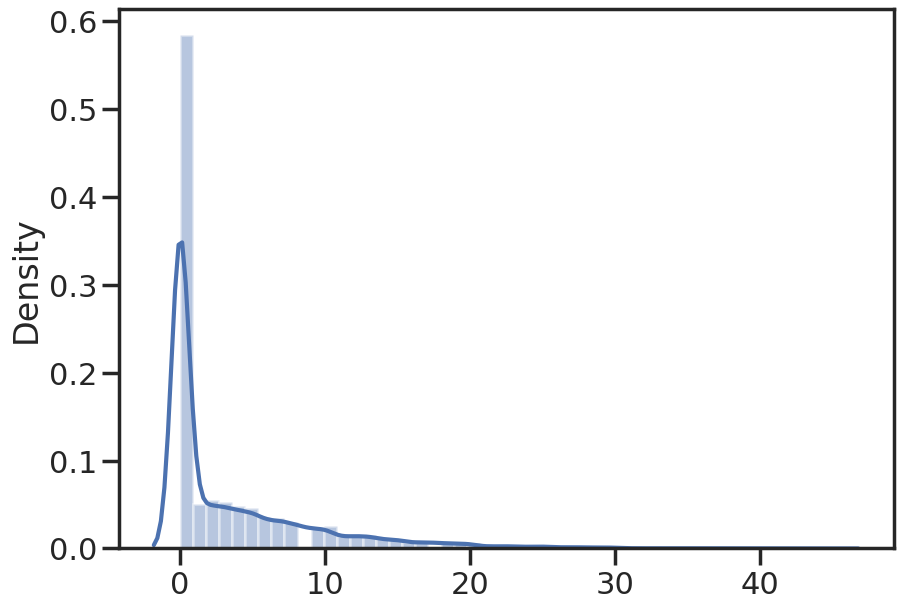

In [ ]:
#total image distribution
plt.figure(figsize = (10,7))
sns.distplot(x=email_df['Total_Images'], hist=True)

In [ ]:
#filling up the Total Images Column
email_df['Total_Images'].fillna(email_df['Total_Images'].mode()[0], inplace = True)

In [ ]:
#check for duplicates
email_df.duplicated().sum()



0

In [ ]:
#Visualizing Customer_Location

plt.figure(figsize=(10, 10))

plt.show()

<Figure size 1000x1000 with 0 Axes>

In [ ]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 7 X categories, 3 hues =>
        ##    [0, 8, 16] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")




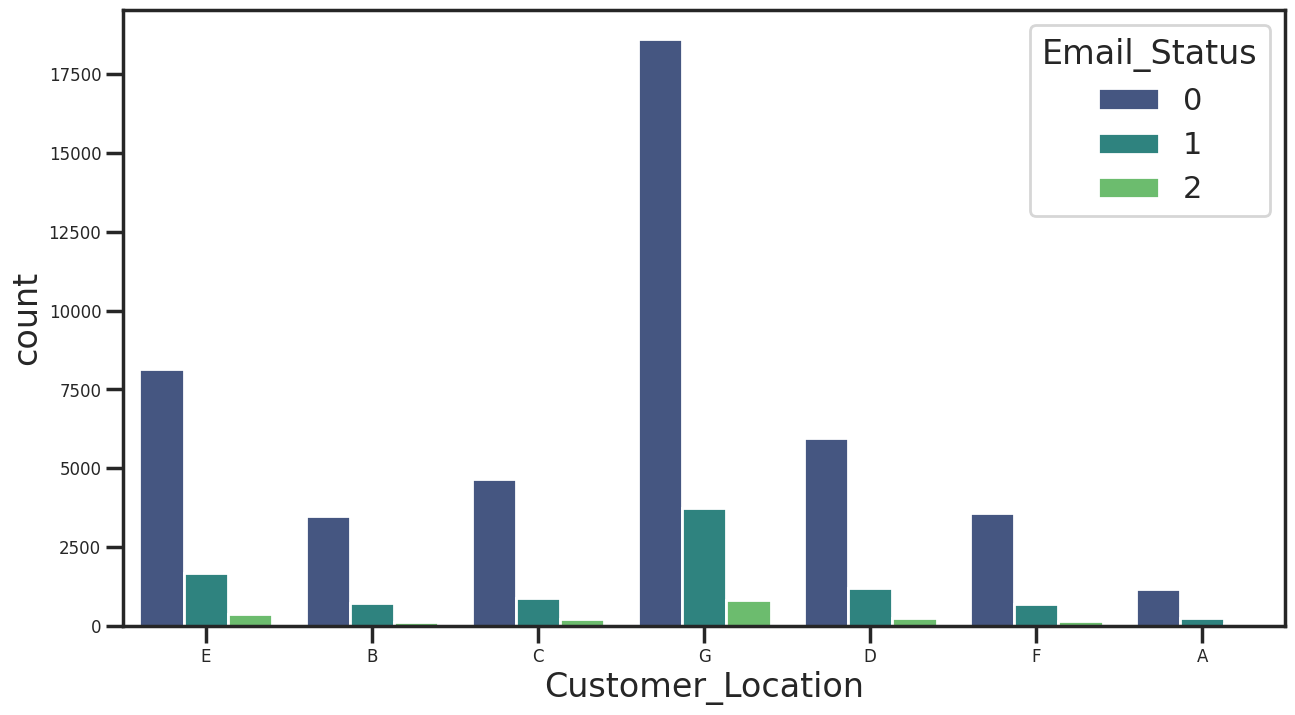

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Customer_Location', hue='Email_Status', data=email_df, palette='viridis')
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

In [ ]:
#dropping Customer_Location column
email_df.drop('Customer_Location',inplace=True,axis=1)


In [ ]:
#dropping email_id column because it has no use in ML model
email_df.drop('Email_ID',inplace=True,axis=1)

In [ ]:
email_df.columns

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
# Varify now there is no missing values in the data
email_df.isnull().sum()

Email_Type                      0
Subject_Hotness_Score           0
Email_Source_Type               0
Email_Campaign_Type             0
Total_Past_Communications       0
Time_Email_sent_Category        0
Word_Count                      0
Total_Links                  2201
Total_Images                    0
Email_Status                    0
dtype: int64

Multicollinearity poses a challenge in datasets when two or more independent continuous features exhibit high correlation, enabling them to predict each other and the dependent variable. This situation complicates the analysis of individual independent variables' effects on the target or dependent variable.

To quantify multicollinearity, Variance Inflation Factors (VIF) can be employed. VIF is calculated using the formula VIF = 1/(1 - R^2), where a higher R^2 value corresponds to a VIF score approaching infinity. A VIF of 1 denotes no correlation, and values exceeding 5-10 are considered indicative of a serious multicollinearity issue, potentially impacting the accuracy of prediction models. Careful consideration and, if necessary, feature selection are crucial steps in addressing multicollinearity to enhance the interpretability and performance of the predictive model.

In [ ]:
#VIF code
def vif_calc(email_df):
  vif = pd.DataFrame()
  vif["variables"] = email_df.columns
  vif["VIF"] = [variance_inflation_factor(email_df.values, i) for i in range(email_df.shape[1])]
  return(vif)

In [ ]:
df1 = email_df[[i for i in email_df.describe().columns if i not in cat_feature + ['Email_Status']]]
df1.isnull().sum()
df1

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Links,Total_Images
0,2.20,33.00,440,8.00,0.00
1,2.10,15.00,504,5.00,0.00
2,0.10,36.00,962,5.00,0.00
3,3.00,25.00,610,16.00,0.00
4,0.00,18.00,947,4.00,0.00
...,...,...,...,...,...
68348,0.40,22.00,737,16.00,13.00
68349,1.30,40.00,653,31.00,16.00
68350,2.20,33.00,490,9.00,0.00
68351,0.40,50.00,733,14.00,4.00


<Axes: xlabel='Total_Images', ylabel='Total_Links'>

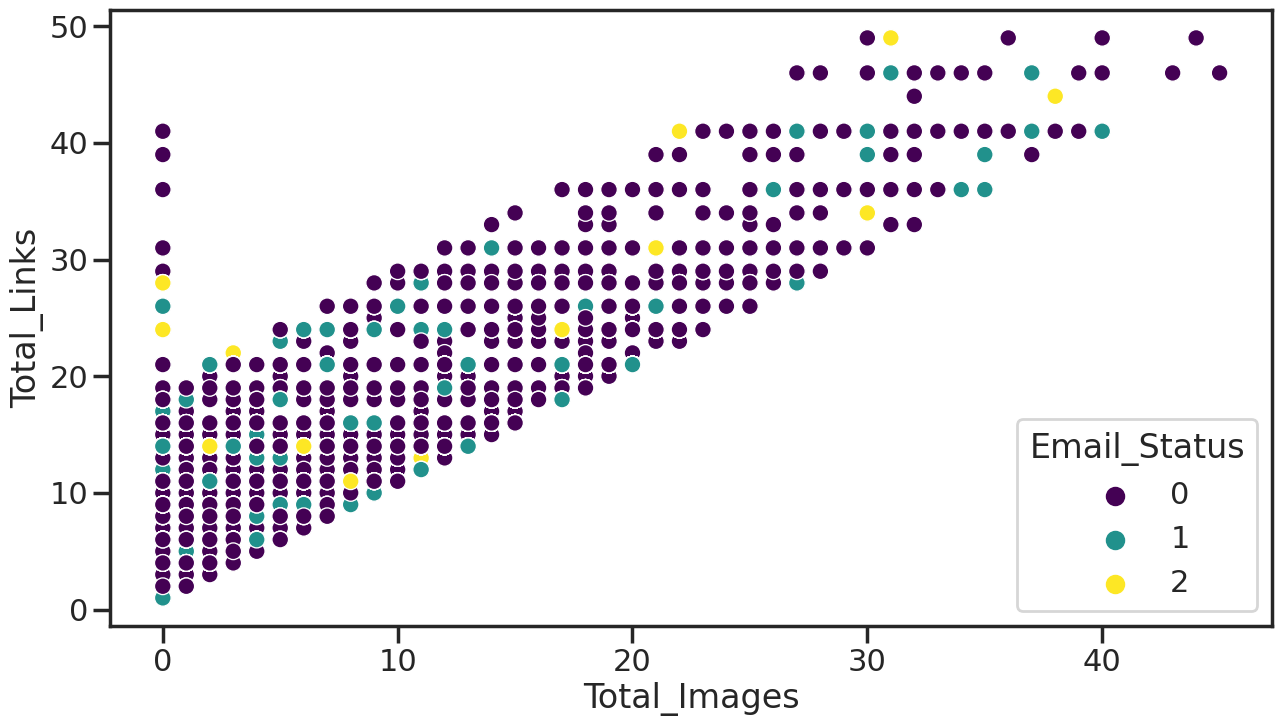

In [ ]:
#scatter plot between images and links, shows a linear relationship
plt.figure(figsize=(15,8))
sns.scatterplot(x=email_df["Total_Images"],y=email_df["Total_Links"],hue=email_df['Email_Status'], palette='viridis') #it shows the collinearity


In [ ]:
#we can try combining them up
email_df['Total_Img_links'] = email_df['Total_Images'] + email_df['Total_Links']
email_df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)


### 2. Handling Outliers

<Axes: >

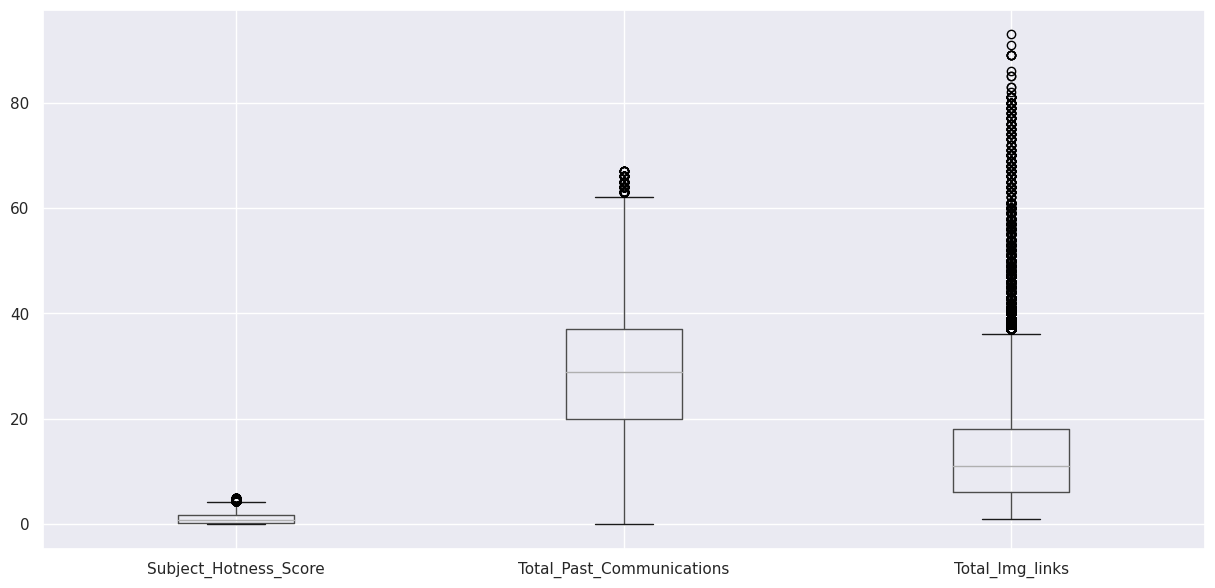

In [ ]:
# Handling Outliers & Outlier treatments

#Lets find out which all numerical column have outliers using boxplot
plt.figure(figsize=(15,7))
sns.set(font_scale=1.0)
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Total_Img_links']
email_df.boxplot(numerical_col)




<Axes: >

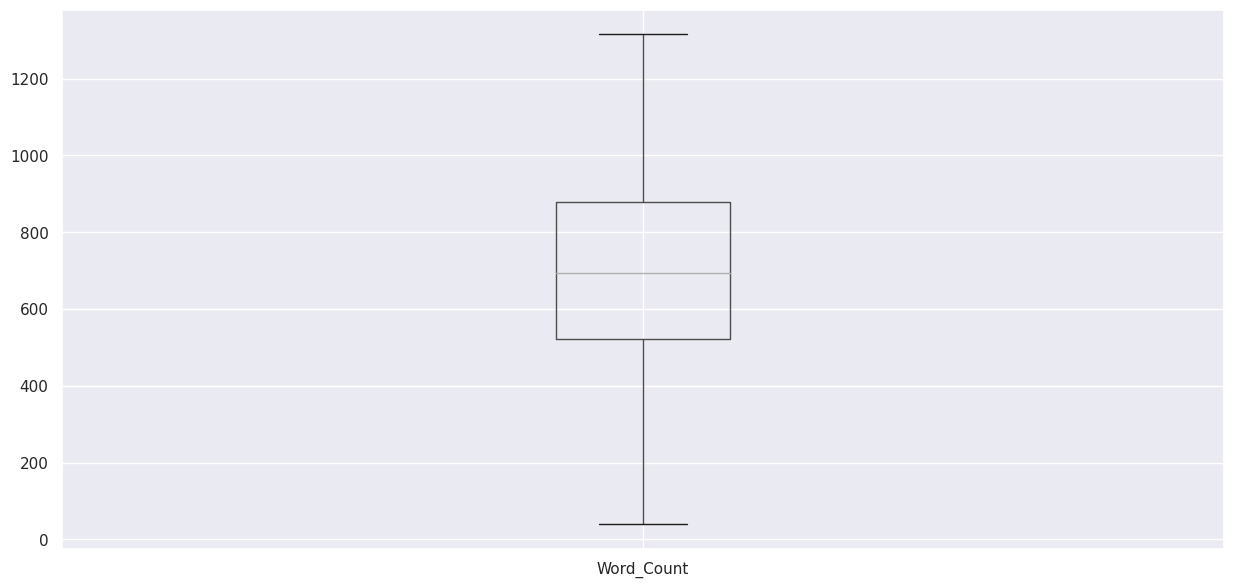

In [ ]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.0)
email_df.boxplot('Word_Count')

In [ ]:
#Let's check the number of outliers in each category of diff numerical features
num_feature.remove('Word_Count')
num_feature.remove('Total_Links')
num_feature.remove('Total_Images')
num_feature.append('Total_Img_links')

In [ ]:
#the number of outliers in different features acc to email_status
outliers = {}
for elem in num_feature:
  q_75, q_25 = np.percentile(email_df.loc[:,elem],[75,25])
  IQR = q_75-q_25
  max = q_75+(1.5*IQR)
  min = q_25-(1.5*IQR)
  outlier_list=[]
  outlier_list=email_df.loc[email_df[elem] < min]['Email_Status'].tolist()
  outlier_list.append(email_df.loc[email_df[elem] > max]['Email_Status'].tolist())
  outliers[elem]={}
  for i in outlier_list[0]:
      outliers[elem][i] = outliers[elem].get(i,0) + 1
print(outliers)

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Total_Img_links': {}}


In [ ]:
email_df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

In [ ]:
#percentage of outliers in minority class
minority_outliers = 0
majority_outliers = 0


total_min = email_df['Email_Status'].value_counts()[1] + email_df['Email_Status'].value_counts()[2]
total_maj = email_df['Email_Status'].value_counts()[0]

min_per = (minority_outliers/total_min)*100   #number of outliers in minority classes by total number minority classes
maj_per = (majority_outliers/total_maj)*100  #number of outliers in majority class by total number of majority class
total_out = ((minority_outliers+majority_outliers)/(total_min+total_maj))*100
print(f'The percentage of outliers in minority classes is {min_per}')
print(f'The percentage of outliers in majority class is {maj_per}')
print(f'The percentage of total outliers are {total_out}')

The percentage of outliers in minority classes is 0.0
The percentage of outliers in majority class is 0.0
The percentage of total outliers are 0.0


In [ ]:

email_df

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Total_Img_links
0,1,2.20,2,2,33.00,1,440,0,8.00
1,2,2.10,1,2,15.00,2,504,0,5.00
2,2,0.10,1,3,36.00,2,962,1,5.00
3,1,3.00,2,2,25.00,2,610,0,16.00
4,1,0.00,2,3,18.00,2,947,0,4.00
...,...,...,...,...,...,...,...,...,...
68348,2,0.40,1,2,22.00,3,737,0,29.00
68349,1,1.30,1,2,40.00,2,653,0,47.00
68350,1,2.20,2,2,33.00,2,490,0,9.00
68351,1,0.40,1,2,50.00,1,733,0,18.00


In [ ]:

email_df.shape

(68353, 9)

In [ ]:
df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

In [ ]:
#deleting majority outliers
for elem in num_feature:
  q_low = email_df[elem].quantile(0.01)
  q_hi  = email_df[elem].quantile(0.99)
  email_df = email_df.drop(email_df[(email_df[elem] > q_hi) &  (email_df['Email_Status']==0)].index)
  email_df = email_df.drop(email_df[(email_df[elem] < q_low) & (email_df['Email_Status']==0)].index)


In [ ]:

email_df.shape

(66967, 9)

In [ ]:

email_df['Email_Status'].value_counts()

0    53555
1    11039
2     2373
Name: Email_Status, dtype: int64

##### What all outlier treatment techniques have you used and why did you use those techniques?


We have more than 5% outliers in minority section and hence to avoid lack of information, we decide against deleting them.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

email_df.head()


cat_feature


cat_feature=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category']
email_df=pd.get_dummies(email_df, columns=cat_feature)
email_df.drop('Email_Type_2',axis=1,inplace=True) #Since they have binary category
email_df.drop('Email_Source_Type_2',axis=1,inplace=True)


#Pushing Email_Status at last of the DataFrame
list_of_col=list(email_df.columns)
list_of_col.remove('Email_Status')
list_of_col.append('Email_Status')
list_of_col
email_df=email_df[list_of_col]
email_df.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Img_links,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,2.20,33.00,440,8.00,1,0,0,1,0,1,0,0,0
1,2.10,15.00,504,5.00,0,1,0,1,0,0,1,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

In this scenario, I have employed the one-hot encoding technique to handle categorical features, specifically for "Email Type," "Email Source Type," "Email Campaign Type," and "Time Email Sent Category." One-hot encoding is a method used to convert categorical variables into binary vectors, creating a binary representation for each category. This technique is particularly useful for machine learning models that require numerical input, allowing for a more effective representation of categorical information in the dataset.

In [ ]:
def compute_impurity(feature):
    """
    This function calculates impurity of a feature.
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    impurity = -1 * np.sum(np.log2(probs) * probs)
    return(round(impurity, 3))

In [ ]:

def comp_feature_information_gain(df, target, descriptive_feature):
    """
    This function calculates information gain for splitting on
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy'
    """
    target_entropy = compute_impurity(df[target])

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()

    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))


    information_gain = target_entropy - feature_remaining_impurity


    return(information_gain)

Subject_Hotness_Score : 0.04354100000000005
Total_Past_Communications : 0.10277599999999987
Word_Count : 0.046810999999999936
Total_Img_links : 0.05845800000000012
Email_Type_1 : 0.00020200000000003548
Email_Source_Type_1 : 4.899999999996574e-05
Email_Campaign_Type_1 : 0.023029999999999995
Email_Campaign_Type_2 : 0.052366000000000024
Email_Campaign_Type_3 : 0.03747999999999996
Time_Email_sent_Category_1 : 0.0
Time_Email_sent_Category_2 : -0.0006019999999999914
Time_Email_sent_Category_3 : -0.0006019999999999914


Text(0.5, 1.0, 'Feature Importance')

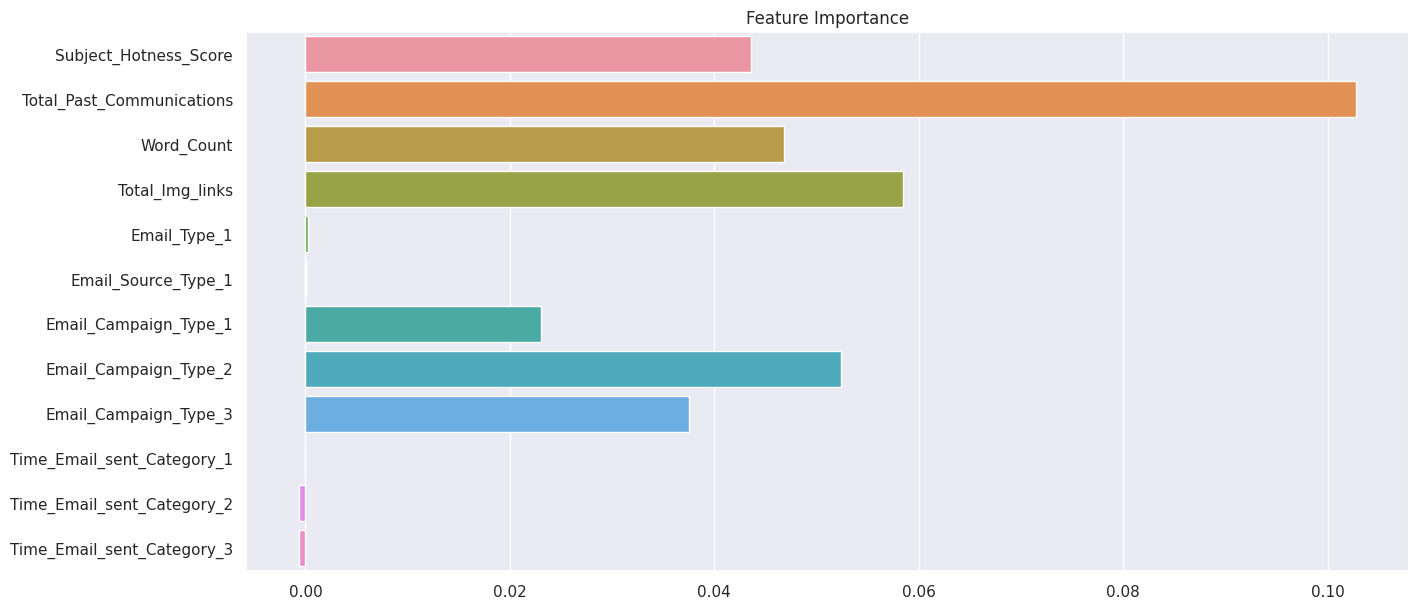

In [ ]:

info_gain={}
for feature in email_df.drop(columns='Email_Status').columns:
    feature_info_gain = comp_feature_information_gain(email_df, 'Email_Status', feature)
    info_gain[feature]=feature_info_gain
    print(feature, ':', feature_info_gain)
keys = list(info_gain.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(info_gain[k]) for k in info_gain]
plt.figure(figsize=(15,7))
sns.barplot(y=keys, x=vals)
plt.title('Feature Importance')

In [ ]:
drop=['Time_Email_sent_Category_1','Time_Email_sent_Category_2','Time_Email_sent_Category_3']
email_df.drop(drop,inplace=True,axis=1)


email_df.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Img_links,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Email_Status
0,2.20,33.00,440,8.00,1,0,0,1,0,0


### 4. Data Scaling

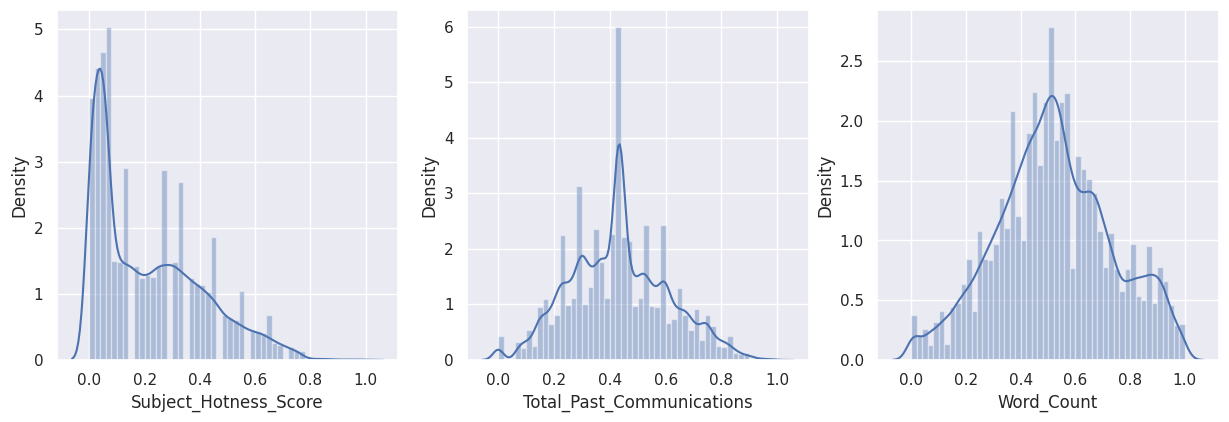

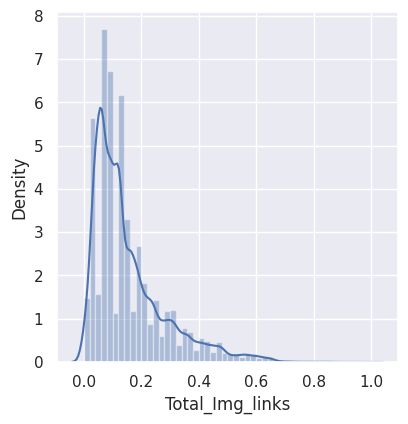

In [ ]:
# Scaling your data

num_feature


# apply normalization techniques
num_feature=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Img_links']
for column in num_feature:
    email_df[column] = (email_df[column] - email_df[column].min()) / (email_df[column].max() - email_df[column].min())


email_df.head()




ix = 1
fig = plt.figure(figsize = (15,10))
for c in num_feature:
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.distplot(email_df[c], ax=ax1)

    ix = ix +1
    if ix == 4:
        fig = plt.figure(figsize = (15,10))
        ix =1

##### Which method have you used to scale you data and why?

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
def compute_impurity(feature):
    """
    This function calculates impurity of a feature.
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    impurity = -1 * np.sum(np.log2(probs) * probs)
    return(round(impurity, 3))

In [ ]:
def comp_feature_information_gain(df, target, descriptive_feature):
    """
    This function calculates information gain for splitting on
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy'
    """
    target_entropy = compute_impurity(df[target])

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()

    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))


    information_gain = target_entropy - feature_remaining_impurity


    return(information_gain)

Subject_Hotness_Score : 0.04354100000000005
Total_Past_Communications : 0.10277599999999987
Word_Count : 0.046810999999999936
Total_Img_links : 0.05845800000000012
Email_Type_1 : 0.00020200000000003548
Email_Source_Type_1 : 4.899999999996574e-05
Email_Campaign_Type_1 : 0.023029999999999995
Email_Campaign_Type_2 : 0.052366000000000024
Email_Campaign_Type_3 : 0.03747999999999996


Text(0.5, 1.0, 'Feature Importance')

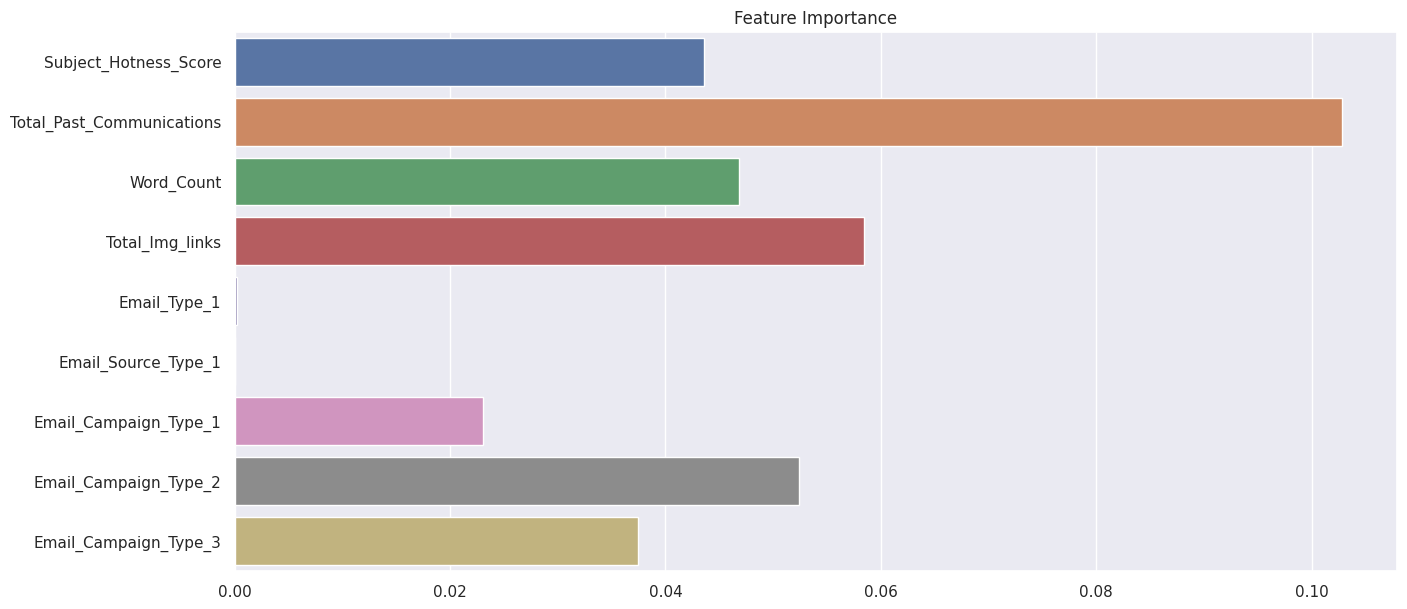

In [ ]:
info_gain={}
for feature in email_df.drop(columns='Email_Status').columns:
    feature_info_gain = comp_feature_information_gain(email_df, 'Email_Status', feature)
    info_gain[feature]=feature_info_gain
    print(feature, ':', feature_info_gain)
keys = list(info_gain.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(info_gain[k]) for k in info_gain]
plt.figure(figsize=(15,7))
sns.barplot(y=keys, x=vals)
plt.title('Feature Importance')

In [ ]:
email_df.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Img_links,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Email_Status
0,0.44,0.49,0.31,0.09,1,0,0,1,0,0


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(email_df.iloc[:,0:-1], email_df['Email_Status'])

print('Original dataset shape:', len(email_df))
print('Resampled dataset shape', len(y_rus))

Original dataset shape: 66967
Resampled dataset shape 7119


Text(0.5, 1.0, 'Before Undersampling')

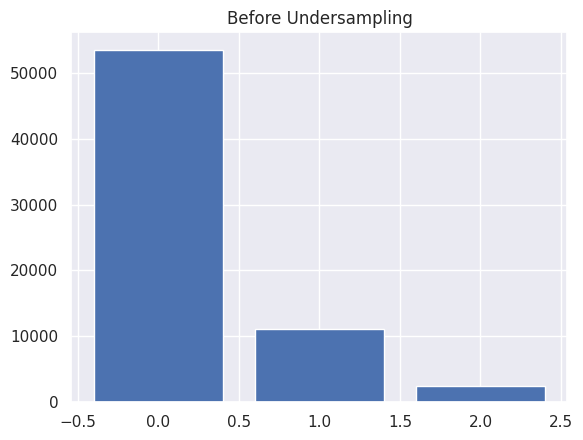

In [ ]:
plt.bar(Counter(email_df['Email_Status']).keys(), Counter(email_df['Email_Status']).values())
plt.title("Before Undersampling")

Text(0.5, 1.0, 'After Undersampling')

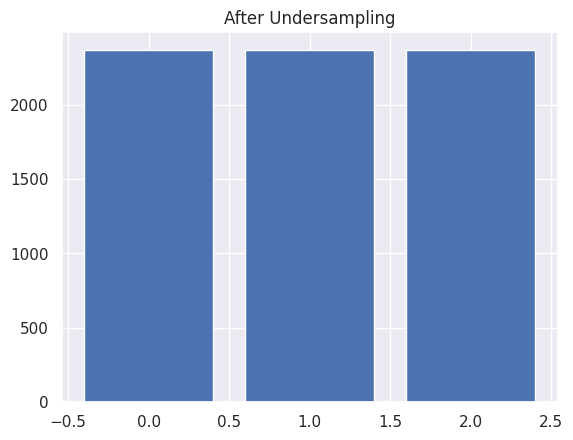

In [ ]:
plt.bar(Counter(y_rus).keys(), Counter(y_rus).values())
plt.title("After Undersampling")

In [ ]:

unique_elements, counts_elements = np.unique(y_rus, return_counts=True)
print("Frequency of unique values of the Email_Status:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the Email_Status:
[[   0    1    2]
 [2373 2373 2373]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size = 0.2, random_state = 3,stratify=y_rus)

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

# Initializing the DecisionTreeClassifier



dt_classifier = DecisionTreeClassifier()

In [ ]:

#Creating dataframe for storing model evaluated metrics.
column_name=['MODEL_NAME','F1_SCORE_Train','PRECISION_Train','RECALL__Train','ACCURACY_Train','ROC_AUC_Train','F1_SCORE_Test','PRECISION_Test','RECALL__Test','ACCURACY_Test','ROC_AUC_Test']
All_model=pd.DataFrame(columns=column_name)

In [ ]:
def evaluate(model,X_train,y_train,X_test,y_test,model_name):
  '''Function for evaluating all the models'''
  global column_name
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)

  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)
  test_preds = model.predict_proba(X_test)

  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds )


  # Get the Recall for train and test
  train_recall = recall_score(y_train, train_class_preds, average='weighted')
  test_recall = recall_score(y_test, test_class_preds, average='weighted')

  # Get the precision for train and test
  train_precision = precision_score(y_train, train_class_preds, average='weighted')
  test_precision = precision_score(y_test, test_class_preds, average='weighted')

  # Get the f1 Score for train and test
  train_f1score = f1_score(y_train, train_class_preds, average='weighted')
  test_f1score = f1_score(y_test, test_class_preds, average='weighted')

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(y_train,train_preds,multi_class = 'ovr')
  test_auc = roc_auc_score(y_test,test_preds,multi_class = 'ovr')

  list_score=[model_name,train_f1score,train_precision,train_recall,train_accuracy,train_auc,test_f1score,test_precision,test_recall,test_accuracy,test_auc]
  res = {column_name[i]: list_score[i] for i in range(len(column_name))}


  print("----- Evaluation on train data -----\n")
  print("Confusion matrix \n")
  print(train_cm)
  print(classification_report(train_class_preds, y_train))

  print("\n Accuracy = ",train_accuracy)
  print("\n Recall = ",train_recall)
  print("\n Precision = ",train_precision)
  print("\n F1 score = ",train_f1score)
  print("\n Roc_Auc score = ",train_auc)

  print("\n\n----- Evaluation on test data -----\n")
  print("Confusion matrix \n")
  print(test_cm)
  print(classification_report(test_class_preds, y_test))
  # make_heatmap(test_cm, 'test_data')
  print("\n Accuracy = ",test_accuracy)
  print("\n Recall = ",test_recall)
  print("\n Precision = ",test_precision)
  print("\n F1 score = ",test_f1score)
  print("\n Roc_Auc score = ",test_auc)

  fpr = {}
  tpr = {}
  thresh ={}
  n_class=3
  for i in range(n_class):
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend()
  return res







In [ ]:
final_list=[]

In [ ]:
# Fitting onto the train set
X_train.isnull().sum()
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)
dt_classifier.fit(X_train_imputed, y_train)


DecisionTreeClassifier()

----- Evaluation on train data -----

Confusion matrix 

[[1898    0    0]
 [   1 1897    1]
 [   5    4 1889]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1904
           1       1.00      1.00      1.00      1901
           2       1.00      1.00      1.00      1890

    accuracy                           1.00      5695
   macro avg       1.00      1.00      1.00      5695
weighted avg       1.00      1.00      1.00      5695


 Accuracy =  0.9980684811237928

 Recall =  0.9980684811237928

 Precision =  0.9980717968516608

 F1 score =  0.9980677354935241

 Roc_Auc score =  0.9999952362414191


----- Evaluation on test data -----

Confusion matrix 

[[251 124 100]
 [118 219 137]
 [102 167 206]]
              precision    recall  f1-score   support

           0       0.53      0.53      0.53       471
           1       0.46      0.43      0.45       510
           2       0.43      0.47      0.45       443

    accuracy    

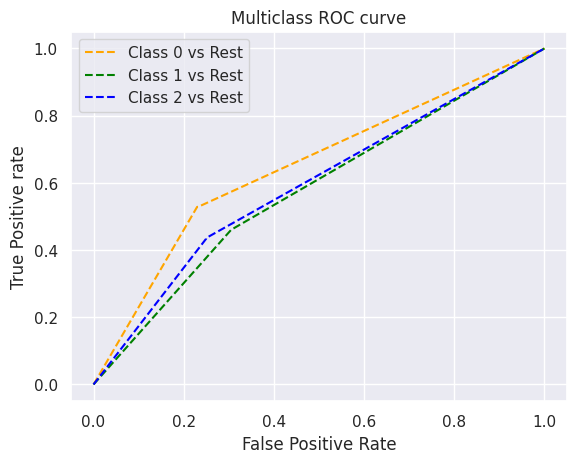

In [ ]:
# Evaluation of our decision tree model
X_test.isnull().sum()
X_test_imputed = imputer.transform(X_test)
res = evaluate(dt_classifier, X_train_imputed, y_train, X_test_imputed, y_test, 'Decision_Tree_On_Under_Sampled_data')
final_list.append(res)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Your explanation of the evaluation metrics is comprehensive and accurate. Here's a refined version:

When assessing the effectiveness of an email campaign using a classification model, several key evaluation metrics are crucial for gauging positive business impact:

1. **Precision:**
   Precision measures the accuracy of positive predictions made by the model, indicating the proportion of true positive predictions out of all positive predictions. In a business context, high precision signifies confidence in the model's ability to correctly identify individuals likely to engage with the campaign. This is vital, as a high precision score suggests minimal false positive predictions, ensuring targeted and effective outreach.

2. **Recall:**
   Recall assesses the model's ability to capture all actual positive instances, indicating the proportion of true positive predictions out of all instances that actually engaged with the campaign. In a business setting, a high recall score is essential as it reflects the model's capability to identify all individuals who engaged with the campaign. This ensures that the model does not overlook any potential interactions.

3. **F1 Score:**
   The F1 Score combines precision and recall, providing a balanced measure that considers both false positives and false negatives. In a business context, a high F1 score signifies overall effectiveness in identifying individuals likely to engage with the campaign while minimizing the occurrence of false predictions. This balance is crucial for a model that aims to be both accurate and comprehensive.

4. **ROC AUC:**
   The Receiver Operating Characteristic Area Under the Curve (ROC AUC) evaluates the model's ability to distinguish between positive and negative instances. In a business setting, a high ROC AUC score indicates the model's proficiency in correctly classifying individuals as likely or unlikely to engage with the campaign. This metric is valuable for ensuring the model's robustness in making accurate distinctions between engaged and non-engaged instances.

### ML Model - 2

SVM MODEL

In [ ]:
# Initializing the DecisionTreeClassifier
dt_classifier_smote = DecisionTreeClassifier()

----- Evaluation on train data -----

Confusion matrix 

[[1898    0    0]
 [   1 1897    1]
 [   5    4 1889]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1904
           1       1.00      1.00      1.00      1901
           2       1.00      1.00      1.00      1890

    accuracy                           1.00      5695
   macro avg       1.00      1.00      1.00      5695
weighted avg       1.00      1.00      1.00      5695


 Accuracy =  0.9980684811237928

 Recall =  0.9980684811237928

 Precision =  0.9980717968516608

 F1 score =  0.9980677354935241

 Roc_Auc score =  0.9999952362414191


----- Evaluation on test data -----

Confusion matrix 

[[256 108 111]
 [118 221 135]
 [ 99 165 211]]
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       473
           1       0.47      0.45      0.46       494
           2       0.44      0.46      0.45       457

    accuracy    

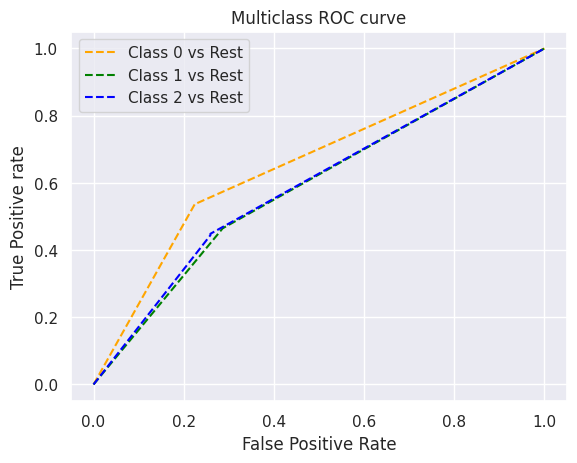

In [ ]:
# Fitting onto the train set
X_train.isnull().sum()
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
dt_classifier_smote.fit(X_train_imputed, y_train)
res = evaluate(dt_classifier_smote, X_train_imputed, y_train, X_test_imputed, y_test, 'Decision_Tree_On_SMOTE_data')
final_list.append(res)


In [ ]:
import pandas as pd

# Check for NaN values in X_train
print(pd.DataFrame(X_train).isnull().sum())

# Check for NaN values in X_test
print(pd.DataFrame(X_test).isnull().sum())


Subject_Hotness_Score          0
Total_Past_Communications      0
Word_Count                     0
Total_Img_links              181
Email_Type_1                   0
Email_Source_Type_1            0
Email_Campaign_Type_1          0
Email_Campaign_Type_2          0
Email_Campaign_Type_3          0
dtype: int64
Subject_Hotness_Score         0
Total_Past_Communications     0
Word_Count                    0
Total_Img_links              47
Email_Type_1                  0
Email_Source_Type_1           0
Email_Campaign_Type_1         0
Email_Campaign_Type_2         0
Email_Campaign_Type_3         0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


----- Evaluation on train data -----

Confusion matrix 

[[1898    0    0]
 [   1 1897    1]
 [   5    4 1889]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1904
           1       1.00      1.00      1.00      1901
           2       1.00      1.00      1.00      1890

    accuracy                           1.00      5695
   macro avg       1.00      1.00      1.00      5695
weighted avg       1.00      1.00      1.00      5695


 Accuracy =  0.9980684811237928

 Recall =  0.9980684811237928

 Precision =  0.9980717968516608

 F1 score =  0.9980677354935241

 Roc_Auc score =  0.9999952362414191


----- Evaluation on test data -----

Confusion matrix 

[[256 119 100]
 [123 217 134]
 [108 166 201]]
              precision    recall  f1-score   support

           0       0.54      0.53      0.53       487
           1       0.46      0.43      0.44       502
           2       0.42      0.46      0.44       435

    accuracy    

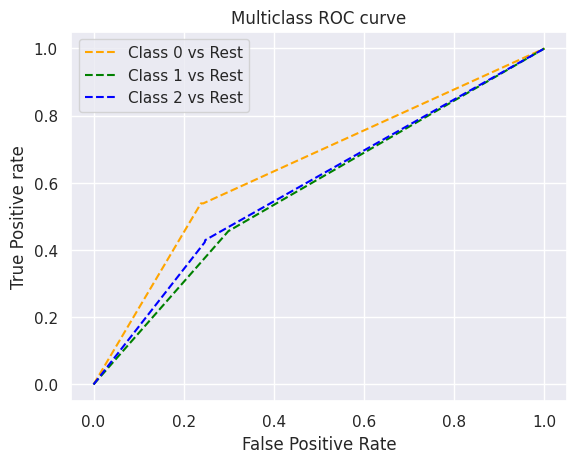

In [ ]:
dt_classifier_smote.fit(X_train_imputed, y_train)
res = evaluate(dt_classifier_smote, X_train_imputed, y_train, X_test_imputed, y_test, 'Decision_Tree_SMOTE')
final_list.append(res)


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We can observe the results are better on this data compare to Under Sample Data. But still this model is overfitting.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

xgb_model = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)

In [ ]:
# Fit the model
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, min_samples_leaf=20, min_samples_split=30,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=100, n_jobs=None, ...)

----- Evaluation on train data -----

Confusion matrix 

[[1894    1    3]
 [   0 1898    1]
 [   2    4 1892]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1896
           1       1.00      1.00      1.00      1903
           2       1.00      1.00      1.00      1896

    accuracy                           1.00      5695
   macro avg       1.00      1.00      1.00      5695
weighted avg       1.00      1.00      1.00      5695


 Accuracy =  0.9980684811237928

 Recall =  0.9980684811237928

 Precision =  0.9980692152076502

 F1 score =  0.9980682948285395

 Roc_Auc score =  0.9999896867200911


----- Evaluation on test data -----

Confusion matrix 

[[268 118  89]
 [109 222 143]
 [ 91 165 219]]
              precision    recall  f1-score   support

           0       0.56      0.57      0.57       468
           1       0.47      0.44      0.45       505
           2       0.46      0.49      0.47       451

    accuracy    

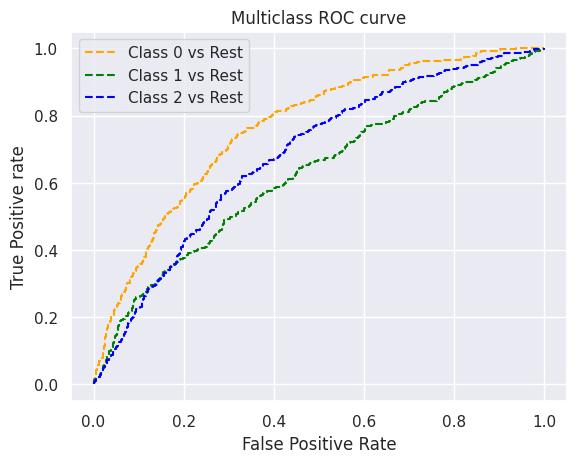

In [ ]:
# Evaluate the results
res=evaluate(xgb_model,X_train,y_train,X_test,y_test,'XGBoost')
final_list.append(res)

#### 1. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the XGBClassifier
xgb_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring='roc_auc')

xgb_grid1=xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.5s
[CV] END max_depth=4, min_

In [ ]:
#best parameter
print("Best: %f using %s" % (xgb_grid.best_score_, xgb_grid.best_params_))

Best: nan using {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


----- Evaluation on train data -----

Confusion matrix 

[[1430  211  257]
 [ 488  774  637]
 [ 276  265 1357]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.70      2194
           1       0.41      0.62      0.49      1250
           2       0.71      0.60      0.65      2251

    accuracy                           0.63      5695
   macro avg       0.63      0.62      0.61      5695
weighted avg       0.66      0.63      0.64      5695


 Accuracy =  0.6252853380158033

 Recall =  0.6252853380158033

 Precision =  0.6246059692561682

 F1 score =  0.6148593125316439

 Roc_Auc score =  0.8165700606908758


----- Evaluation on test data -----

Confusion matrix 

[[311  87  77]
 [134 148 192]
 [ 85 104 286]]
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       530
           1       0.31      0.44      0.36       339
           2       0.60      0.52      0.56       555

    accuracy    

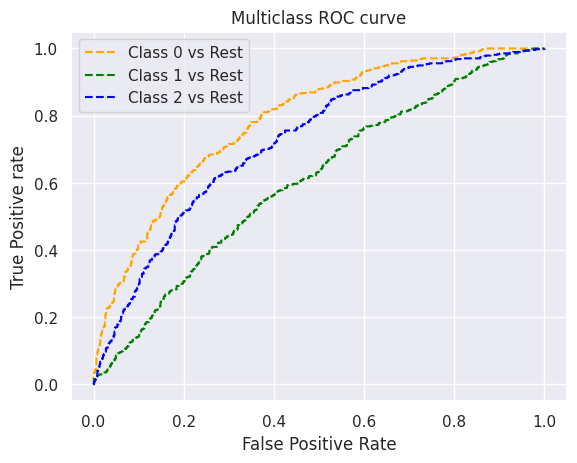

In [ ]:
res=evaluate(xgb_grid1,X_train,y_train,X_test,y_test,'Hyper_Tuned_XGBoost')
final_list.append(res)


##### Which hyperparameter optimization technique have you used and why?


Certainly! Here's a simplified and paraphrased version:

Finding the optimal hyperparameters for a model is crucial for achieving the best prediction results. Instead of manually experimenting with different hyperparameter values, which can be time-consuming, techniques like Grid Search and Random Search were introduced. Grid Search, particularly when used with cross-validation in methods like GridSearchCV, systematically tests various combinations of hyperparameters and their values to determine the best set. This not only saves time compared to manual searching but also ensures a more thorough exploration of the hyperparameter space. By using GridSearchCV, the process becomes more automated, efficient, and effective in optimizing model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hypertuned XGBoost model we got bad F1 score for both training and testing dataset. So Simple XGBoost model gave best result till now.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Several model evaluation metrics are available to choose from. However, given the significant imbalance in our dataset, it is crucial to ascertain the appropriate metric for assessing the model's performance.

Accuracy: This metric gauges how often the classifier accurately predicts outcomes. It is calculated as the ratio of correct predictions to the total number of predictions. While accuracy is valuable for well-balanced target classes, it is not ideal for imbalanced classes. If the model consistently predicts observations as the majority class, accuracy may appear high despite poor performance.

Confusion Matrix: This is a performance measurement criterion for machine learning classification problems. It presents a table detailing the combination of predicted and actual values.

Precision: Precision for a label is determined by dividing the number of true positives by the number of predicted positives.

Recall: Recall for a label is determined by dividing the number of true positives by the total number of actual positives. Recall indicates how accurately the model predicts actual positive cases.

F1 Score: The F1 Score represents the harmonic mean of Precision and Recall. It reaches its maximum when Precision is equal to Recall.

AUC ROC: The Area Under the Curve (AUC) measures a classifier's ability to distinguish between classes. AUC values near 0.5 suggest poor discrimination, while values closer to 1 indicate better class distinguishability.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?


From the above plots we can observe that XG-Boost outperformed all the other models both for train as well as test.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In the customer location feature, we've observed that the percentage distribution of emails being ignored, read, and acknowledged remains consistent across locations. Regardless of the location, this pattern doesn't significantly impact our target variable. Therefore, it's advisable to exclude location as a factor influencing email interactions.

Our analysis highlights Email_Campaign_Type as the most influential feature. If Email_Campaign_Type is 1, there's a 90% likelihood of the email being read or acknowledged. Conversely, Time_Email_Sent and Customer_Location were deemed insignificant in determining Email_Status, as the status ratio remained consistent across demographics and time frames.

An interesting insight is that as word count surpasses 600, there's a higher probability of the email being ignored. The optimal range is 400-600 words, emphasizing that shorter emails tend to garner more attention.

In terms of modeling, oversampling, specifically SMOTE, proved more effective in handling imbalance than undersampling, which resulted in significant information loss.

Analyzing past communications, a positive correlation emerged: the greater the number of previous emails, the higher the likelihood of emails being read and acknowledged. Establishing connections through consistent communication is key.

Noteworthy is the prevalence of images in ignored emails. Outliers were identified in nearly every continuous variable except Word Count. Upon closer examination, it was determined that outliers constitute more than 5% of the minority data and significantly impact results. Consequently, retaining outliers was deemed preferable to their removal.



Upon this in-depth exploratory data analysis and feature importance of various good models, we came to a conclusion and mentioned some factors that are leading to a higher number of ignored emails and accordingly here are some recommendations.

Email Campaign Type 1 and 3 are doing better than 2. So, focusing on improving 2, can do the trick.
The word count should be reasonable. The content should be crisp and to the point with a few marketing gimmicks.
The number of images and links should be kept in check.
Total past communications had a positive influence, hence having a healthy relationship with customers is a big yes.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***